In [1]:
options(warn=-1)
library(ggplot2)
library(gridExtra)
library(reshape2)
library(RColorBrewer)
suppressMessages(library(plyr))
suppressMessages(library(dplyr))
library(stringr)
suppressMessages(library(tidyr))
theme_set(theme_bw())
library(parallel)
library(scales)
library(knitr)
library(IRdisplay)
suppressMessages(library(Biostrings))
options(repr.plot.width=7, repr.plot.height=4)

isotypes = c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'iMet', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')
display_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8'='8', 'X9'='9', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26','X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')

# includes all paired including 3d
#paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X9.23'='*9:23', 'X10.25'='10:25', 'X10.45'='*10:45', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X22.46'='*22:46', 'X26.44'='*26:44', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61')
paired_identities = c('GC', 'AU', 'UA', 'CG', 'GU', 'UG', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble', 'Paired', 'Bulge', 'Mismatched', 'Absent')

single_positions = c('X8'='8', 'X9'='9', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')
single_identities = c('A', 'C', 'G', 'U', 'Purine', 'Pyrimidine', 'Weak', 'Strong', 'Amino', 'Keto', 'B', 'D', 'H', 'V', 'N', 'Absent')

colors = c('A '='gray20', 'C '='gray20', 'G '='gray20', 'U '='gray20', 'Absent '='gray20', 'Purine '='gray20', 'Pyrimidine '='gray20', 'Weak'='gray20', 'Strong'='gray20', 'Amino'='gray20', 'Keto'='gray20', 'B'='gray50', 'D'='gray50', 'H'='gray50', 'V'='gray50', 'N' = 'gray20', 'GC'='gray20', 'AU'='gray20', 'UA'='gray20', 'CG'='gray20', 'GU'='gray20', 'UG'='gray20', 'PurinePyrimidine'='gray20', 'PyrimidinePurine'='gray20', 'StrongPair'='gray20', 'WeakPair'='gray20', 'AminoKeto'='gray20', 'KetoAmino'='gray20', 'Wobble'='gray20', 'Paired '='gray20', 'Bulge '='gray20', 'Mismatched '='gray20', 'High mismatch rate' = 'gray20')
fills = c('A '='#ffd92f', 'C '='#4daf4a', 'G '='#e41a1c', 'U '='#377eb8', 'Purine '='#ff8300', 'Pyrimidine '='#66c2a5', 'Weak'='#b3de69', 'Strong'='#fb72b2', 'Amino'='#c1764a', 'Keto'='#b26cbd', 'B '='#e5c494', 'D'='#ccebd5', 'H'='#ffa79d', 'V'='#a6cdea', 'N' = 'white', 'Absent '='gray50', 'Mismatched '='gray20', 'Paired '='#ffffcc', 'High mismatch rate' = 'gray70')

# simple codes for reviewer #3
simple_identities = c('A' = 'A ', 'C' = 'C ', 'G' = 'G ', 'U' = 'U ', 'Purine' = 'Purine ', 'Pyrimidine' = 'Pyrimidine ', 
                      'Weak' = 'A/U (W) ', 'Strong' = 'G/C (S) ', 'Amino' = 'A/C (M) ', 'Keto' = 'G/U (K) ', 
                      'B' = 'C/G/U (B) ', 'D' = 'A/G/U (D) ', 'H' = 'A/C/U (H) ', 'V' = 'A/C/G (V) ', 'N' = 'N ', 'Absent' = 'Absent ', 'Paired' = 'Paired ', 'Mismatched' = 'Mismatched ', 'X' = 'High mismatch rate       ')
colors = c(colors, 'A/U (W) ' = 'gray20', 'G/C (S) ' = 'gray20', 'A/C (M) ' ='gray20', 'G/U (K) ' = 'gray20', 'C/G/U (B) ' = 'gray50', 'A/G/U (D) ' = 'gray50', 'A/C/U (H) ' = 'gray50', 'A/C/G (V) ' = 'gray50', 'N ' = 'gray20', 'High mismatch rate       ' = 'gray20')
fills = c(fills, 'A/U (W) ' = '#b3de69', 'G/C (S) ' = '#fb72b2', 'A/C (M) ' ='#c1764a', 'G/U (K) ' = '#b26cbd', 'C/G/U (B) ' = '#e5c494', 'A/G/U (D) ' = '#ccebd5', 'A/C/U (H) ' = '#ffa79d', 'A/C/G (V) ' = '#a6cdea', 'N ' = 'white', 'High mismatch rate       ' = 'gray90')

In [72]:
identities = read.delim('identities-041718.tsv', sep='\t') %>%
  filter(isotype %in% isotypes) %>%
  mutate(quality = as.logical(quality),
         restrict = as.logical(restrict),
         duplicate = as.logical(duplicate),
         adjusted = as.logical(adjusted),
         abbrev = str_extract(species_long, '^\\w+ \\w+')) %>%
  mutate(abbrev = paste0(str_extract(abbrev, '^\\w'), '. ', str_extract(abbrev, '\\w+$'))) %>%
  mutate(abbrev = ifelse(str_detect(species_long, "sp\\."), paste0(str_extract(species_long, '^\\w+'), ' sp.'), abbrev))

In [3]:
load('best-freqs.RData')
load('clade-isotype-specific.RData')
load('isotype-specific.RData')
load('consensus-IDEs.RData')
load('clade-isotype-freqs.RData')

# Universal and near-universal sequence features

In [4]:
clade_iso_freqs %>%
  group_by(positions, feature) %>%
  summarize(freq = sum(n) / sum(clade_iso_pos_total)) %>% 
  filter((positions == 'X8.14' & feature == 'UA') | 
         (positions == 'X14' & feature == 'A') | 
         (positions == 'X9' & feature == 'Purine') | 
         (positions == 'X11.24' & feature == 'PyrimidinePurine') | 
         (positions == 'X15.48' & feature == 'PurinePyrimidine') | 
         (positions == 'X16' & feature == 'Pyrimidine') |  
         (positions == 'X18.55' & feature == 'GU') |  
         (positions == 'X55' & feature == 'U') | 
         (positions == 'X19.56' & feature == 'GC') | 
         (positions == 'X21' & feature == 'A') | 
         (positions == 'X32' & feature == 'Pyrimidine') | 
         (positions == 'X33' & feature == 'Pyrimidine') | 
         (positions == 'X33' & feature == 'U') | 
         (positions == 'X37' & feature == 'Purine') | 
         (positions == 'X46' & feature == 'Purine') | 
         (positions == 'X48' & feature == 'Pyrimidine') | 
         (positions == 'X52.62' & feature == 'PurinePyrimidine') | 
         (positions == 'X53.61' & feature == 'GC') | 
         (positions == 'X54.58' & feature == 'UA') | 
         (positions == 'X57' & feature == 'Purine') | 
         (positions == 'X60' & feature == 'Pyrimidine'))

,positions,feature,freq
1,X11.24,PyrimidinePurine,0.973027049905729
2,X14,A,0.996767863326792
3,X15.48,PurinePyrimidine,0.932391873172233
4,X16,Pyrimidine,0.903843933972065
5,X18.55,GU,0.987263842394859
6,X19.56,GC,0.97364269498634
7,X21,A,0.993958982646504
8,X32,Pyrimidine,0.988610566008696
9,X33,Pyrimidine,0.993458771018508
10,X33,U,0.983993227904113


# No. genomes and tRNAs

In [5]:
identities %>% mutate(clade = as.character(clade)) %>%
  count(clade, species, abbrev, restrict) %>% spread(restrict, n, 0) %>%
  group_by(clade) %>% summarize(Genomes = length(unique(abbrev)), tRNAs = sum(c(`FALSE`, `TRUE`)), Analyzed = sum(`FALSE`)) %>%
  rbind(c("Total", sum(.$Genomes), sum(.$tRNAs), sum(.$Analyzed)))

,clade,Genomes,tRNAs,Analyzed
1,Fungi,53,12753,4793
2,Insect,18,4803,1664
3,Mammal,45,27579,9663
4,Nematode,13,6022,1582
5,Plant,20,12480,4162
6,Vertebrate,16,12019,4125
7,Total,165,75656,25989


# Sequence features

## Isotype-specific sequence features

In [6]:
get_5prime = Vectorize(function(identity) c("A"="A", "G"="G", "C"="C", "U"="U", "Purine"="Purine", "Pyrimidine"="Pyrimidine", "Amino"="Amino", "Keto"="Keto", "Weak"="Weak", "Strong"="Strong", "B"="B", "H"="H", "D"="D", "V"="V","N"="N",
                                            "GC"="G", "AU"="A", "UA"="U", "CG"="C", "GU"="G", "UG"="U", "Absent"="Absent", "PurinePyrimidine"="Purine", "PyrimidinePurine"="Pyrimidine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Amino", "KetoAmino"="Keto", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched", "X"="X")[identity])
get_3prime = Vectorize(function(identity) c("A"="A", "G"="G", "C"="C", "U"="U", "Purine"="Purine", "Pyrimidine"="Pyrimidine", "Amino"="Amino", "Keto"="Keto", "Weak"="Weak", "Strong"="Strong", "B"="B", "H"="H", "D"="D", "V"="V","N"="N",
                                            "GC"="C", "AU"="U", "UA"="A", "CG"="G", "GU"="U", "UG"="G", "Absent"="Absent", "PurinePyrimidine"="Pyrimidine", "PyrimidinePurine"="Purine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Keto", "KetoAmino"="Amino", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched", "X"="X")[identity])

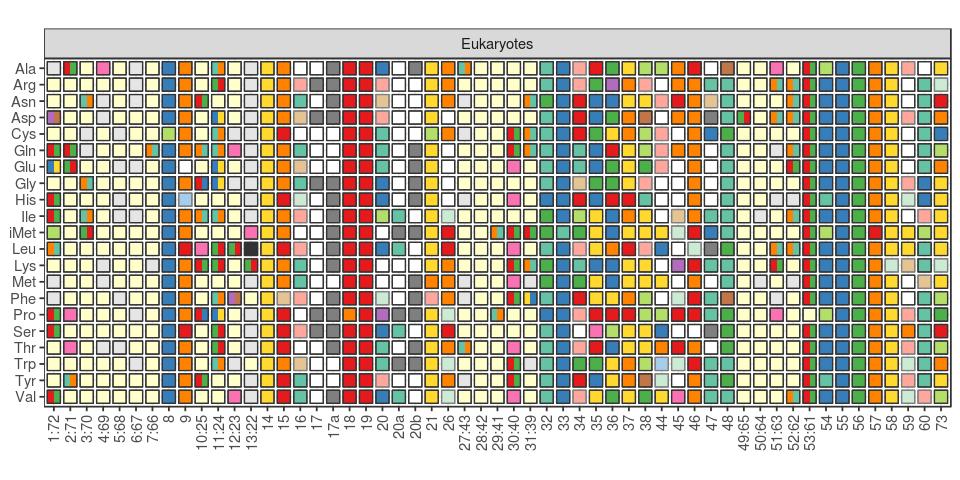

In [7]:
selected_positions = c('X2.71', 'X3.70', 'X4.69', 'X5.68', 'X6.67', 'X12.23', 'X20a', 'X26', 'X27.43', 'X28.42', 'X29.41', 'X30.40', 'X45', 'X50.64', 'X52.62')
iso_plot = isotype_specific %>% 
  filter(positions %in% names(display_positions)) %>% 
  mutate(positions=factor(positions, names(display_positions))) %>%
  ungroup() %>%
  mutate(isotype=factor(isotype, levels=rev(isotypes))) %>% 
  rbind(expand.grid(isotype = isotypes, positions = names(paired_positions), identity = 'X')) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(single_positions), identity = 'N')) %>%
  group_by(isotype, positions) %>%
  summarize(identity = ifelse((length(identity) > 1) & (identity[1] %in% c('X', 'N')), identity[2], identity[1])) %>% 
  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -positions, -identity) %>%
  mutate(half_identity = revalue(half_identity, simple_identities, warn_missing = FALSE), identity = revalue(identity, simple_identities, warn_missing = FALSE)) %>%
  mutate(side = as.integer(as.factor(side)) - 1) %>% 
  mutate(xmin = as.integer(positions) + 0.5 * side - 0.5 + 0.1 * (1 - side),
         xmax = as.integer(positions)+ 0.5 * side - 0.1 * side,
         ymin = as.integer(isotype) - 0.5 + 0.1,
         ymax = as.integer(isotype) + 0.5 - 0.1) %>%
  mutate(half_identity=factor(half_identity)) %>%
  mutate(facet = "Eukaryotes") %>%
  ggplot() + 
    geom_rect(aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=half_identity)) + 
    geom_tile(aes(x=positions, y=isotype, color=identity), alpha = 0, width=0.8, height=0.8, size=0.35) +
    facet_wrap(~ facet) +
    scale_x_discrete(labels = display_positions, drop = FALSE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_color_manual(breaks = simple_identities, values = colors) + 
    scale_fill_manual(breaks = simple_identities, values = fills) +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),
          axis.title=element_blank(),
          legend.position='none') + 
    coord_equal()
  
options(repr.plot.width=8, repr.plot.height=4)
iso_plot
ggsave(iso_plot, filename = "fig2a-isotype-features.pdf", width = 8, height = 4)

## Clade-specific sequence features

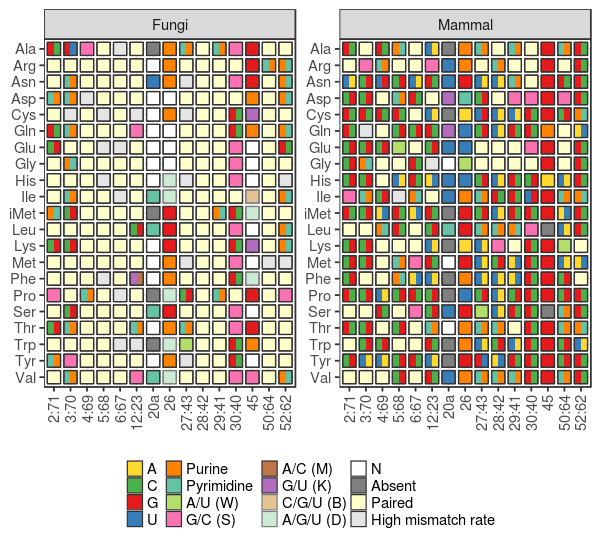

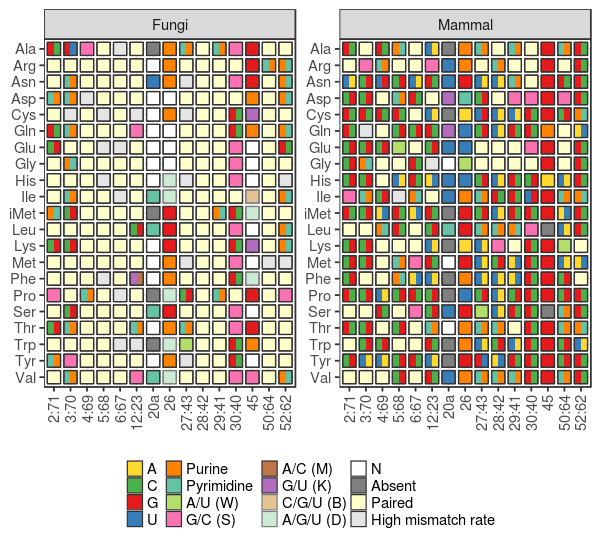

In [8]:
clade_plot = clade_isotype_specific %>% 
  ungroup %>%
  filter(positions %in% names(display_positions)) %>% 
  filter(clade %in% c("Mammal", "Fungi")) %>%
  mutate(positions = factor(positions, names(display_positions)), 
         isotype = factor(isotype, levels = rev(isotypes))) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(paired_positions), clade = c('Fungi', 'Mammal'), identity = 'X')) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(single_positions), clade = c('Fungi', 'Mammal'), identity = 'N')) %>%
  group_by(isotype, clade, positions) %>%
  summarize(identity = ifelse((length(identity) > 1) & (identity[1] %in% c('X', 'N')), identity[2], identity[1])) %>% 
  mutate(left = get_5prime(identity), right = get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -clade, -positions, -identity) %>%
  mutate(positions = factor(positions, levels = selected_positions)) %>%
  mutate(half_identity = revalue(half_identity, simple_identities, warn_missing = FALSE), identity = revalue(identity, simple_identities, warn_missing = FALSE)) %>% 
  mutate(side = as.integer(as.factor(side)) - 1) %>% 
  mutate(xmin = as.integer(positions) + 0.5 * side - 0.5 + 0.1 * (1 - side),
         xmax = as.integer(positions)+ 0.5 * side - 0.1 * side,
         ymin = as.integer(isotype) - 0.5 + 0.1,
         ymax = as.integer(isotype) + 0.5 - 0.1) %>%
  filter(!is.na(positions)) %>%
  mutate(half_identity=factor(half_identity), identity=factor(half_identity)) %>%
  ggplot() + 
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = half_identity)) + 
    geom_tile(aes(x = positions, y = isotype, color = identity), alpha = 0, width = 0.8, height = 0.8, size = 0.35) + 
    facet_wrap(~ clade, scales = "free", ncol = 2) +
    scale_x_discrete(labels = display_positions[selected_positions], drop = TRUE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_color_manual(breaks = simple_identities, values = colors) + 
    scale_fill_manual(breaks = simple_identities, values = fills) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
          legend.key.width = unit(0.7, "lines"),
          legend.key.height = unit(0.7, "lines"),
          axis.title=element_blank(),
          legend.position = "bottom") +
    guides(fill = guide_legend(title = NULL, nrow = 4), color = guide_legend(title = NULL, nrow = 4), alpha = FALSE) +
    coord_equal()

options(repr.plot.width=5, repr.plot.height=4.55)
clade_plot
ggsave(clade_plot, filename = "fig2b-clade-features.pdf", width = 5, height = 4.55)
clade_plot

## Cross-clade difference heatmap

Strategy: (1) generate isotype-clade-specific covariance model, (2) align all tRNAs of the other clade to the model, (4) parse position-specific bit scores, (5) average scores by position and isotype, (6) plot!

In [9]:
compare_clade_bits = function(clade1, clade2) {
  
  bits = data.frame()  
  euk_seqs = readDNAStringSet(filepath = '/projects/lowelab/users/blin/identity/euk-isotypes/euk-tRNAs.fa', format = 'fasta')
  names(euk_seqs) = str_replace(str_extract(names(euk_seqs), '\\S+'), '\\|', '_')

  # Get bit scores for each position in each isotype
  for (current_isotype in isotypes) {
    subset = identities %>% filter(!restrict, isotype == current_isotype, clade == clade1)
    writeXStringSet(euk_seqs[match(subset$seqname, names(euk_seqs))], filepath = paste0(clade1, '-', current_isotype, '.fa'))
  
    # create covariance model from clade 1
    system(paste0('cmalign -g --notrunc --matchonly -o ', clade1, '-', current_isotype, '.sto /projects/lowelab/users/blin/tRNAscan/models/domain-specific/euk-num-092016.cm ', clade1, '-', current_isotype,'.fa > /dev/null'))
    system(paste0('cmbuild --hand --enone -F ', clade1, '-', current_isotype, '.cm ', clade1, '-', current_isotype, '.sto > /dev/null'))

    # align clade 2 tRNAs to clade 1 cm
    subset = identities %>% filter(!restrict, isotype == current_isotype, clade == clade2)
    writeXStringSet(euk_seqs[match(subset$seqname, names(euk_seqs))], filepath = paste0(clade2, '-', current_isotype, '.fa'))
    system(paste0('cmalign -g --notrunc --matchonly --tfile ', clade1, '-', clade2, '-', current_isotype, '.tfile ', clade1, '-', current_isotype, '.cm ', clade2, '-', current_isotype, '.fa > /dev/null'))
    system(paste0('python parse-parsetree.py ', clade1, '-', clade2, '-', current_isotype, '.tfile > ', clade1, '-', clade2, '-', current_isotype, '.bits'))
    
    # Add to data frame
    df = read.table(paste0(clade1, '-', clade2, '-', current_isotype, '.bits'), comment.char = '', header = FALSE) %>% 
      mutate(Isotype = current_isotype, Clade = clade2)
    bits = rbind(bits, df)

    # clean up
    system(paste0('rm ', clade1, '-', clade2, '-', current_isotype, '.tfile ', clade1, '-', clade2, '-', current_isotype, '.bits'))
    system(paste0('rm ', clade1, '-', current_isotype, '.fa ', clade1, '-', current_isotype, '.sto ', clade1, '-', current_isotype, '.cm ', clade2, '-', current_isotype, '.fa'))
  }
  
  bits %>% mutate(Position = factor(V2, c('1:72', '2:71', '3:70', '4:69', '5:68', '6:67', '7:66', '8', '9', '10:25', '11:24', '12:23', '13:22', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '26', '27:43', '28:42', '29:41', '30:40', '31:39', '32', '33', '34', '35', '36', '37', '38', '44', '45', '46', '47', '48', '49:65', '50:64', '51:63', '52:62', '53:61', '54', '55', '56', '57', '58', '59', '60', '73')),
                       Bits = V3,
                       Identity = V4) %>%
    select(-V1, -V2, -V3, -V4) %>%
    filter(!is.na(Position)) %>%
    group_by(Position, Isotype, Clade) %>%
    summarize(Bits = mean(Bits)) %>%
    ungroup
}

In [10]:
bits = compare_clade_bits("Mammal", "Fungi")

In [11]:
compare_plot = bits %>%
  filter(Position %in% display_positions[selected_positions]) %>%
  mutate(Position = factor(Position, levels = display_positions[selected_positions])) %>%
  mutate(facet = "Mammal vs Fungi") %>%
  ggplot() + geom_tile(aes(x = Position, y = Isotype, fill = Bits), width = 0.8, height = 0.8) +
    geom_tile(aes(x = Position, y = Isotype), alpha = 0, color = 'gray20', width = 0.8, height = 0.8, size = 0.35) +
    facet_wrap(~ facet) +
    scale_x_discrete(labels = display_positions[selected_positions], drop = TRUE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_fill_gradientn(colors = c("mediumpurple4", "firebrick", "white", "steelblue"),
                         values = c(0, 0.5, 0.75, 1),
                         limits = c(-15, 5)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
          axis.title.y = element_blank(),
          plot.margin = unit(c(5.5, 5.5, 14, 5.5), "points"),
          legend.key.height = unit(0.5, "lines"),
          legend.position = "bottom") +
    guides(fill = guide_colorbar(title = "Score", barwidth = 7)) + 
    xlab('Position') + ylab('Isotype') + coord_equal()

# options(repr.plot.width=2.5, repr.plot.height=4.55)
# compare_plot
# ggsave(compare_plot, filename = "fig2c-mammal-vs-fungi.pdf", width = 2.5, height = 4.55)

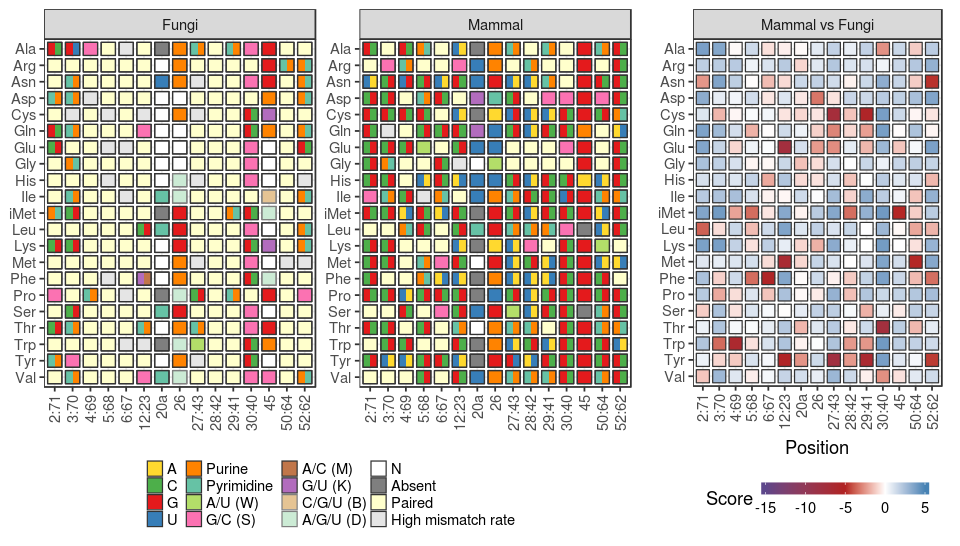

In [12]:
options(repr.plot.width=8, repr.plot.height=4.55)
plot = grid.arrange(clade_plot, compare_plot, layout_matrix = rbind(c(2, 2, 3)))
ggsave(plot, filename = 'fig2b-mammal-vs-fungi.pdf', width = 8, height = 4.55)

# Feature distributions

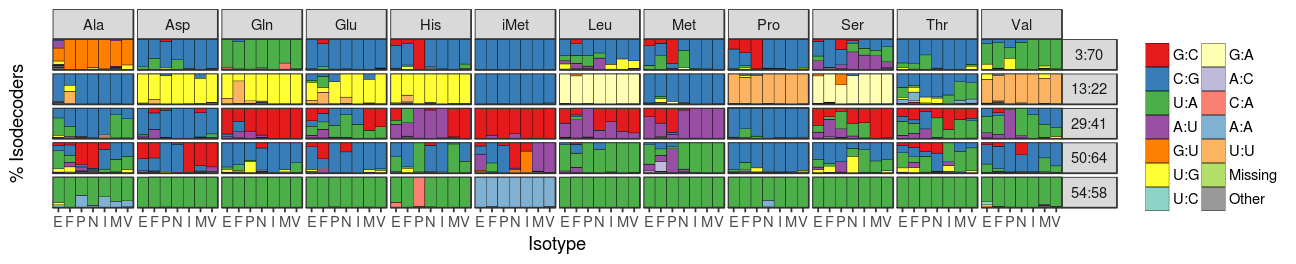

In [13]:
plot = identities %>% filter(!restrict) %>%
  select(isotype, clade, X3.70, X13.22, X29.41, X50.64, X54.58) %>%
  rbind(identities %>%
    select(isotype, X3.70, X13.22, X29.41, X50.64, X54.58) %>%
    mutate(clade = 'All')) %>%
  gather(positions, identity, -isotype, -clade) %>%
  mutate(identity = ifelse(identity %in% c("A:-", "-:A", "C:-", "-:C", "G:-", "-:G", "U:-", "-:U"), "Missing", identity)) %>%
  filter(identity %in% c("G:C", "C:G", "U:A", "A:U", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "Missing")) %>%
  group_by(isotype, clade, positions) %>%
  mutate(freq = n()) %>% 
  ungroup %>%
  count(isotype, clade, positions, identity, freq) %>%
  mutate(freq = n/freq) %>%
  ungroup %>% rowwise %>%
  mutate(identity = ifelse(freq < 0.05, "Other", identity)) %>%
  ungroup %>%
  mutate(positions = revalue(positions, c('X3.70' = '3:70', 'X13.22' = '13:22', 'X29.41' = '29:41', 'X50.64' = '50:64', 'X54.58' = '54:58')),
         clade = revalue(clade, c("All" = "E", "Fungi" = "F", "Nematode" = "N", "Plant" = "P", "Insect" = "I", "Mammal" = "M", "Vertebrate" = "V")),
         identity = factor(identity, levels = c("G:C", "C:G", "U:A", "A:U", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "Missing", "Other"))) %>%
  mutate(positions = factor(positions, levels = c('3:70', '13:22', '29:41', '50:64', '54:58')),
         clade = factor(clade, levels = c("E", "F", "P", "N", "I", "M", "V")),
         isotype = factor(isotype, levels = isotypes)) %>%
  filter(isotype %in% c('Ala', 'Asp', 'Gln', 'Glu', 'His', 'iMet', 'Leu', 'Met', 'Pro', 'Ser', 'Thr', 'Val')) %>%
  ggplot() + geom_bar(aes(x = clade, y = freq, fill = identity), width = 1, color = 'black', size = 0.1, stat = 'identity') +
    facet_grid(positions ~ isotype, scales = "free") +
    scale_fill_manual(values = c(brewer.pal(6, "Set1"), brewer.pal(7, "Set3"), "gray60")) + 
    scale_x_discrete(expand = c(0, 0)) +
    scale_y_continuous(expand = c(0, 0)) +
    xlab("Isotype") + ylab("% Isodecoders") +
    theme(axis.title.x = element_text(margin = margin(t = 5)),
          axis.title.y = element_text(margin = margin(r = 15)),
          axis.ticks.y = element_blank(),
          axis.text.y = element_blank(),
          strip.text.y = element_text(angle = 0),
          panel.spacing = unit(0.15, "lines"),
          legend.key.width = unit(1, "lines"),
          legend.key.height = unit(1, "lines"),
          legend.title = element_blank()) +
    guides(fill = guide_legend(ncol = 2))

options(repr.plot.width=10.8, repr.plot.height=2.2)
plot
ggsave(plot, filename = "fig3a-feature-distributions.pdf", width = 10.8, height = 2.2, dpi = 300)

# Feature exceptions

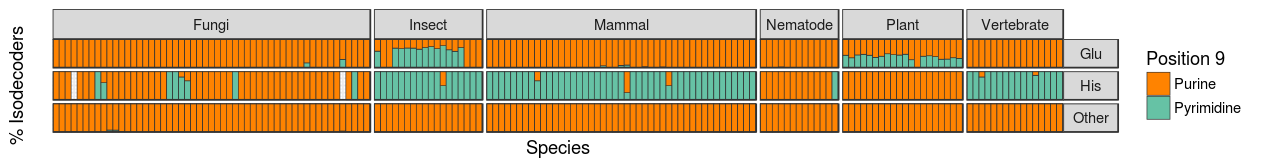

In [14]:
plot = identities %>% filter(isotype == "Glu") %>%
  count(isotype, clade, species_long, X9) %>%
  rbind(identities %>% filter(!restrict, isotype == "His") %>% count(isotype, species_long, clade, X9)) %>% 
  rbind(identities %>% filter(!restrict, !(isotype %in% c("Glu", "His"))) %>% 
          count(species_long, clade, X9) %>% 
          mutate(isotype = "Other")) %>% 
  ungroup %>%
  mutate(species_long = str_extract(species_long, "^\\w+ \\w+"),
         purine = ifelse(X9 %in% c("A", "G"), "Purine", "Pyrimidine")) %>%
  group_by(clade, isotype, species_long, purine) %>%
  summarize(n = sum(n)) %>%
  group_by(clade, isotype, species_long) %>%
  mutate(n = n/sum(n)) %>%
  droplevels %>%
  ggplot() + geom_bar(aes(x = species_long, y = n, fill = purine), width = 1, color = 'gray20', size = 0.2, stat = 'identity', position = 'stack') +
    facet_grid(isotype ~ clade, scales = "free", space = "free") +
    scale_y_continuous(expand = c(0, 0)) +
    scale_fill_manual(values = c('Purine' = '#ff8300', 'Pyrimidine' = '#66c2a5')) + 
    theme(axis.text = element_blank(),
          axis.ticks = element_blank(),
          axis.title.x = element_text(margin = margin(t = 2)),
          axis.title.y = element_text(margin = margin(r = 15)),
          strip.text.y = element_text(angle = 0),
          legend.key.width = unit(1, "lines"),
          legend.key.height = unit(1, "lines"),
          panel.spacing = unit(0.15, "lines")) +
    guides(fill = guide_legend(title = "Position 9")) +
    labs(x = "Species", y = "% Isodecoders")

options(repr.plot.width=10.51, repr.plot.height=1.4)
plot
ggsave(plot, filename = "fig3b-position9.pdf", width = 10.51, height = 1.4, dpi = 300)

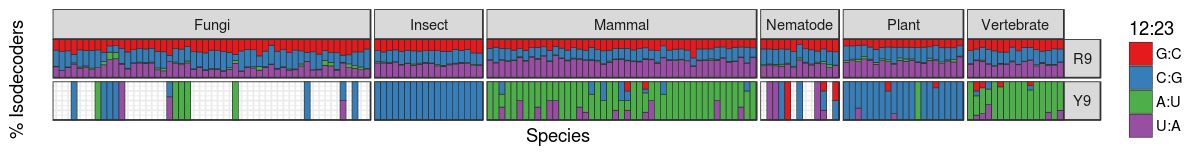

In [15]:
plot = identities %>% filter(!restrict) %>%
  filter(X12.23 %in% c("U:A", "G:C", "C:G", "A:U")) %>%
  mutate(purine = ifelse(X9 %in% c("A", "G"), "R9", ifelse(X9 != "-", "Y9", "-9"))) %>%
  filter(purine != "-9") %>%
  mutate(species_long = str_extract(species_long, "^\\w+ \\w+")) %>%
  count(clade, species_long, purine, X12.23) %>%
  group_by(clade, purine, species_long) %>%
  mutate(n = n / sum(n),
         X12.23 = factor(X12.23, levels = c("G:C", "C:G", "A:U", "U:A"))) %>%
  ggplot() + geom_bar(aes(x = species_long, y = n, fill = X12.23), width = 1, color = 'gray20', size = 0.2, stat = 'identity') + 
    facet_grid(purine ~ clade, scales = "free", space = "free") +
    scale_fill_manual(values = c(brewer.pal(4, "Set1"))) +
    scale_y_continuous(expand = c(0, 0)) +
    theme(axis.text = element_blank(),
          axis.ticks = element_blank(),
          axis.title.x = element_text(margin = margin(t = 2)),
          axis.title.y = element_text(margin = margin(r = 15)),
          strip.text.y = element_text(angle = 0),
          legend.key.width = unit(1, "lines"),
          legend.key.height = unit(1, "lines"),
          panel.spacing = unit(0.15, "lines")) +
    guides(fill = guide_legend(title = "12:23")) +
    labs(x = "Species", y = "% Isodecoders")

options(repr.plot.width=10, repr.plot.height=1.3)
plot
ggsave(plot, filename = "fig3c-position9-12-23.pdf", width = 10, height = 1.3, dpi = 300)

Joining, by = c("species_long", "isotype", "clade", "C:G", "U:A", "U:G", "position")
Joining, by = c("species_long", "isotype", "clade", "C:C", "C:U", "G:C", "U:A", "U:C", "U:U", "position")


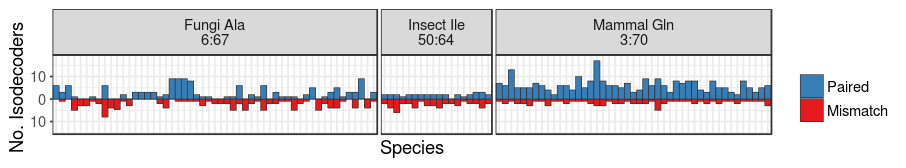

In [16]:
plot = identities %>% filter(!restrict, clade == "Fungi", isotype == 'Ala') %>% 
  count(X6.67, species_long, isotype, clade) %>% 
  spread(X6.67, n, 0) %>%
  mutate(position = '6:67') %>%
  full_join(identities %>% filter(!restrict, clade == "Mammal", isotype == "Gln") %>% 
              count(X3.70, species_long, isotype, clade) %>%
              spread(X3.70, n, 0) %>%
              mutate(position = '3:70')) %>%
  full_join(identities %>% filter(!restrict, clade == "Insect", isotype == "Ile") %>% 
              count(X50.64, species_long, isotype, clade) %>%
              spread(X50.64, n, 0) %>%
              mutate(position = '50:64', clade = 'Insect')) %>%
  replace(is.na(.), 0) %>%
  gather(feature, n, -species_long, -isotype, -clade, -position) %>%
  ungroup %>%
  mutate(mismatch = !(feature %in% c('A:U', 'C:G', 'G:C', 'G:U', 'U:A', 'U:G'))) %>%
  group_by(species_long, isotype, clade, position) %>% summarize(Paired = sum(ifelse(mismatch, 0, n)), Mismatch = -sum(ifelse(mismatch, n, 0))) %>%
  gather(matchcol, value, Paired, Mismatch) %>%
  mutate(matchcol = relevel(factor(matchcol), "Paired")) %>%
  ungroup %>%
  mutate(species_long = str_extract(species_long, '^\\w+ \\w+')) %>%
  group_by(species_long, isotype, clade, position, matchcol) %>%
  summarize(value = mean(value)) %>%
  ungroup %>%
  mutate(clade = paste0(clade, ' ', isotype, '\n', position)) %>%
  ggplot() + geom_bar(aes(x = species_long, y = value, fill = matchcol), width = 1, color = 'gray20', size = 0.2, stat = 'identity', position = 'stack') +
    facet_grid(~ clade, scales = 'free_x', space = 'free_x') + 
    scale_y_continuous(labels = c('10', '0', '10'), breaks = c(-10, 0, 10), limits = c(-14, 18)) +
    scale_fill_brewer(palette = 'Set1', direction = -1) + 
#     ylim(-14, 18) +
    theme(axis.text.x = element_blank(),
          axis.title.y = element_text(margin = margin(r = 4)),
          axis.title.x = element_text(margin = margin(t = 2)),
          axis.ticks.x = element_blank(),
          axis.ticks.length = unit(0.1, "lines"),
          legend.key.width = unit(1, "lines"),
          legend.key.height = unit(1, "lines"),
          panel.spacing.x = unit(0.15, "lines"),
          legend.title = element_blank()) +
    labs(x = "Species", y = "   No. Isodecoders")

options(repr.plot.width=7.55, repr.plot.height=1.4)
plot
ggsave(plot, filename = "fig3d-mismatch.pdf", width = 7.55, height = 1.4, dpi = 300)

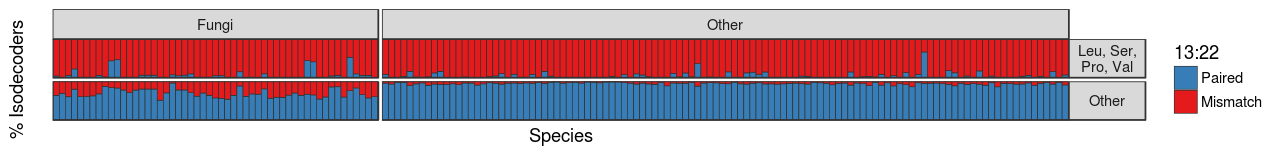

In [17]:
plot = identities %>% filter(!restrict) %>%
  mutate(mismatch = ifelse(X13.22 %in% c("A:U", "U:A", "U:G", "G:U", "C:G", "G:C"), "Paired", "Mismatch"),
         clade = ifelse(clade == "Fungi", "Fungi", "Other"),
         species_long = str_extract(species_long, "^\\w+ \\w+")) %>% 
  mutate(isotype = ifelse(!(isotype %in% c("Pro", "Val", "Leu", "Ser")), "Other", "Leu, Ser,\nPro, Val")) %>%
  count(isotype, clade, species_long, mismatch) %>%
  group_by(isotype, clade, species_long) %>%
  mutate(n = n / sum(n)) %>% 
  ungroup %>%
  ggplot() + geom_bar(aes(x = species_long, y = n, fill = mismatch), width = 1, color = 'gray20', size = 0.2, stat = 'identity', position = 'stack') +
    facet_grid(isotype ~ clade, scale = "free", space = "free") + 
    scale_y_continuous(expand = c(0, 0)) +
    scale_fill_brewer(palette = 'Set1') + 
    theme(axis.text = element_blank(),
          axis.ticks = element_blank(),
          axis.title.x = element_text(margin = margin(t = 2)),
          axis.title.y = element_text(margin = margin(r = 15)),
          strip.text.y = element_text(angle = 0),
          legend.key.width = unit(1, "lines"),
          legend.key.height = unit(1, "lines"),
          panel.spacing = unit(0.15, "lines")) +
    guides(fill = guide_legend(reverse = TRUE, title = "13:22")) +
    labs(x = "Species", y = "% Isodecoders")

options(repr.plot.width=10.67, repr.plot.height=1.3)
plot
ggsave(plot, filename = 'fig3e-mismatch-13-22.pdf', width = 10.67, height = 1.3, dpi = 300)

# Supplementary tables & figures

## Clade-isotype restricted set stats

In [18]:
df = identities %>% group_by(isotype, clade, restrict) %>% 
  summarize(count = n()) %>%
  ungroup()

df = rbind(df, cbind(expand.grid(isotype = unique(df$isotype), 
                                 clade = unique(df$clade), 
                                 restrict = unique(df$restrict)), count = 0)) %>%
  rbind(df %>% group_by(clade, restrict) %>% summarize(isotype = "Total", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(isotype, restrict) %>% summarize(clade = "Total", count = sum(count)) %>% ungroup) %>%
  rbind(df %>% group_by(restrict) %>% summarize(isotype = "Total", clade = "Total", count = sum(count)) %>% ungroup)

df %>% group_by(isotype, clade, restrict) %>% 
  summarize(count = sum(count)) %>%
  group_by(isotype, clade) %>%
  arrange(restrict) %>%
  summarize(count = paste0(paste0(count, collapse=' ('), ')')) %>%
  spread(clade, count) %>%
  kable(format = 'html') %>% paste0(collapse = '\n') %>% display_html()

isotype,Fungi,Insect,Mammal,Nematode,Plant,Vertebrate,Total
Ala,300 (564),97 (220),988 (7071),98 (288),235 (642),254 (2138),1972 (10923)
Arg,447 (516),162 (197),871 (643),154 (286),373 (469),321 (446),2328 (2557)
Asn,149 (278),33 (109),293 (392),39 (164),212 (260),138 (207),864 (1410)
Asp,105 (478),37 (182),166 (355),30 (211),127 (435),63 (279),528 (1940)
Cys,117 (101),53 (62),628 (565),26 (102),140 (165),183 (199),1147 (1194)
Gln,238 (256),89 (110),350 (297),66 (177),180 (241),166 (260),1089 (1341)
Glu,241 (585),75 (225),452 (1223),81 (326),184 (481),226 (291),1259 (3131)
Gly,282 (680),88 (268),539 (996),108 (350),220 (725),212 (394),1449 (3413)
His,137 (181),24 (96),78 (292),30 (134),44 (207),63 (124),376 (1034)
Ile,190 (446),83 (115),398 (364),69 (201),226 (366),175 (296),1141 (1788)


## Species-isotype tRNA, restricted, and duplicated counts

In [80]:
df = identities %>% group_by(isotype, species_long, clade) %>% summarize(tRNAs = n()) %>%
  left_join(identities %>% filter(!restrict) %>% group_by(isotype, species_long, clade, adjusted) %>% summarize(Analyzed = n()), by = c('isotype', 'species_long', 'clade'))


In [75]:
which(is.na(df))

[1] 15077 15078 15105 15706 15918 16068 17587 18048 18049 18050 18051 18106
[13] 18708 18709 18736 19337 19549 19699 21218 21679 21680 21681 21682 21737

In [81]:
df %>% filter(is.na(adjusted))

,isotype,species_long,clade,tRNAs,adjusted,Analyzed
1,Asp,Cryptococcus gattii WM276,Fungi,1,NA,NA
2,Asp,Cryptococcus neoformans var. grubii H99,Fungi,1,NA,NA
3,Asp,Flammulina velutipes KACC42780,Fungi,11,NA,NA
4,Glu,Sporisorium reilianum SRZ2,Fungi,6,NA,NA
5,His,Botrytis cinerea B05.10,Fungi,4,NA,NA
6,His,Ustilago maydis 521,Fungi,1,NA,NA
7,Trp,Penicillium chrysogenum P2niaD18,Fungi,3,NA,NA
8,iMet,Fusarium graminearum CS3005,Fungi,2,NA,NA
9,iMet,Fusarium graminearum PH-1 NRRL 31084,Fungi,2,NA,NA
10,iMet,Fusarium pseudograminearum CS3096,Fungi,2,NA,NA


In [ ]:
identities %>% filter(species == 'peniChry_P2NIAD18', isotype == "Trp", 

In [ ]:
isotype_indices = identities.loc[(identities.species == species) & (identities.isotype == isotype) & (-identities.restrict)].index
    quality_indices = identities.loc[(identities.species == species) & (identities.isotype == isotype) & (-identities.restrict) & (identities.quality)].index
    unique_scores_indices = isotype_indices[-identities.iloc[isotype_indices].score.duplicated()]
    unique_quality_indices = quality_indices[-identities.iloc[quality_indices].score.duplicated()]
    identities.loc[unique_scores_indices, 'duplicate'] = False

In [85]:
identities %>% filter(isotype == 'Trp', species_long == 'Penicillium chrysogenum P2niaD18') %>% kable %>% paste0(collapse='\n') %>% display_markdown

|clade |domain    |isotype |seqname                              |species           |species_long                     | taxid|isotype_best |anticodon | score| isoscore| isoscore_ac| intron|        GC|adjusted | insertions| deletions| D.loop| AC.loop| TPC.loop| V.arm|quality |restrict |duplicated |duplicate |X1.72 |X1 |X1i1 |X2.71 |X2 |X2i1 |X3.70 |X3 |X3i1 |X3i2 |X3i3 |X3i4 |X3i5 |X3i6 |X4.69 |X4 |X4i1 |X4i2 |X4i3 |X4i4 |X4i5 |X4i6 |X4i7 |X4i8 |X4i9 |X4i10 |X4i11 |X5.68 |X5 |X5i1 |X5i2 |X5i3 |X5i4 |X5i5 |X5i6 |X5i7 |X6.67 |X6 |X6i1 |X7.66 |X7 |X7i1 |X7i2 |X7i3 |X7i4 |X7i5 |X7i6 |X7i7 |X7i8 |X7i9 |X7i10 |X7i11 |X7i12 |X7i13 |X7i14 |X8 |X8.14.21 |X8.14 |X8i1 |X8i2 |X8i3 |X8i4 |X9 |X9.12.23 |X9.23 |X9i1 |X9i2 |X10.25 |X10 |X10.25.45 |X10.45 |X10i1 |X10i2 |X11.24 |X11 |X12.23 |X12 |X12i1 |X13.22 |X13 |X13.22.46 |X14 |X14i1 |X14i2 |X14i3 |X14i4 |X14i5 |X14i6 |X14i7 |X14i8 |X14i9 |X14i10 |X14i11 |X14i12 |X14i13 |X14i14 |X14i15 |X14i16 |X14i17 |X14i18 |X14i19 |X14i20 |X14i21 |X14i22 |X14i23 |X14i24 |X14i25 |X14i26 |X14i27 |X14i28 |X14i29 |X14i30 |X14i31 |X14i32 |X14i33 |X14i34 |X14i35 |X14i36 |X14i37 |X14i38 |X14i39 |X14i40 |X14i41 |X14i42 |X14i43 |X14i44 |X14i45 |X14i46 |X14i47 |X14i48 |X15 |X15.48 |X16 |X16i1 |X16i2 |X16i3 |X16i4 |X16i5 |X16i6 |X16i7 |X16i8 |X16i9 |X16i10 |X16i11 |X16i12 |X16i13 |X16i14 |X16i15 |X16i16 |X17 |X17a |X18 |X18.55 |X19 |X19.56 |X19i1 |X19i2 |X19i3 |X19i4 |X19i5 |X19i6 |X19i7 |X19i8 |X19i9 |X19i10 |X19i11 |X19i12 |X19i13 |X19i14 |X19i15 |X19i16 |X19i17 |X19i18 |X19i19 |X19i20 |X19i21 |X19i22 |X19i23 |X19i24 |X19i25 |X19i26 |X19i27 |X19i28 |X19i29 |X19i30 |X19i31 |X19i32 |X19i33 |X19i34 |X19i35 |X19i36 |X19i37 |X19i38 |X19i39 |X19i40 |X19i41 |X19i42 |X19i43 |X19i44 |X19i45 |X19i46 |X19i47 |X19i48 |X19i49 |X19i50 |X19i51 |X19i52 |X19i53 |X19i54 |X19i55 |X19i56 |X19i57 |X20 |X20i1 |X20i2 |X20i3 |X20i4 |X20a |X20b |X21 |X22 |X22.46 |X22i1 |X23 |X23i1 |X23i2 |X23i3 |X23i4 |X23i5 |X23i6 |X24 |X24i1 |X25 |X25i1 |X25i2 |X25i3 |X25i4 |X25i5 |X25i6 |X25i7 |X25i8 |X25i9 |X25i10 |X25i11 |X25i12 |X25i13 |X25i14 |X25i15 |X25i16 |X25i17 |X25i18 |X25i19 |X25i20 |X25i21 |X25i22 |X25i23 |X25i24 |X25i25 |X25i26 |X25i27 |X25i28 |X25i29 |X25i30 |X25i31 |X25i32 |X25i33 |X25i34 |X25i35 |X25i36 |X25i37 |X25i38 |X25i39 |X25i40 |X25i41 |X25i42 |X25i43 |X25i44 |X25i45 |X25i46 |X25i47 |X25i48 |X25i49 |X25i50 |X25i51 |X25i52 |X25i53 |X25i54 |X25i55 |X25i56 |X25i57 |X26 |X26.44 |X26i1 |X26i2 |X26i3 |X26i4 |X26i5 |X26i6 |X26i7 |X26i8 |X26i9 |X26i10 |X26i11 |X26i12 |X26i13 |X26i14 |X26i15 |X26i16 |X26i17 |X26i18 |X26i19 |X26i20 |X26i21 |X26i22 |X26i23 |X26i24 |X26i25 |X26i26 |X26i27 |X26i28 |X26i29 |X26i30 |X26i31 |X26i32 |X26i33 |X26i34 |X26i35 |X26i36 |X26i37 |X26i38 |X26i39 |X26i40 |X26i41 |X26i42 |X26i43 |X26i44 |X26i45 |X26i46 |X26i47 |X26i48 |X26i49 |X26i50 |X26i51 |X26i52 |X26i53 |X27.43 |X27 |X27i1 |X27i2 |X27i3 |X27i4 |X28.42 |X28 |X28i1 |X29.41 |X29 |X29i1 |X29i2 |X30.40 |X30 |X30i1 |X31.39 |X31 |X32 |X33 |X34 |X35 |X35i1 |X36 |X37 |X37i1 |X37i2 |X37i3 |X37i4 |X37i5 |X37i6 |X37i7 |X37i8 |X37i9 |X37i10 |X37i11 |X37i12 |X37i13 |X37i14 |X37i15 |X37i16 |X37i17 |X37i18 |X37i19 |X37i20 |X37i21 |X37i22 |X38 |X38i1 |X39 |X39i1 |X40 |X40i1 |X40i2 |X40i3 |X40i4 |X41 |X41i1 |X41i2 |X41i3 |X41i4 |X42 |X42i1 |X43 |X44 |X44i1 |X44i2 |X44i3 |X44i4 |X44i5 |X44i6 |X44i7 |X44i8 |X44i9 |X44i10 |X44i11 |X44i12 |X44i13 |X44i14 |X44i15 |X44i16 |X44i17 |X44i18 |X44i19 |X44i20 |X44i21 |X44i22 |X44i23 |X45 |V11.V21 |V12.V22 |V13.V23 |V14.V24 |V15.V25 |V16.V26 |V17.V27 |V1 |V2 |V3 |V4 |V5 |V11 |V12 |V13 |V14 |V15 |V16 |V17 |V21 |V22 |V23 |V24 |V25 |V26 |V27 |X46 |X47 |X47i1 |X47i2 |X47i3 |X48 |X49.65 |X49 |X49i1 |X50.64 |X50 |X50i1 |X50i2 |X50i3 |X50i4 |X50i5 |X50i6 |X50i7 |X50i8 |X51.63 |X51 |X51i1 |X51i2 |X51i3 |X52.62 |X52 |X52i1 |X53.61 |X53 |X53i1 |X53i2 |X54 |X54.58 |X54i1 |X54i2 |X54i3 |X54i4 |X55 |X55i1 |X55i2 |X55i3 |X55i4 |X55i5 |X56 |X56i1 |X56i2 |X56i3 |X56i4 |X57 |X57i1 |X58 |X58i1 |X58i2 |X58i3 |X58i4 |X58i5 |X58i6 |X58i7 |X58i8 |X58i9 |X58i10 |X58i11 |X58i12 |X58i13 |X58i14 |X58i15 |X58i16 |X58i17 |X59 |X59i1 |X60 |X60i1 |X60i2 |X60i3 |X60i4 |X60i5 |X60i6 |X60i7 |X60i8 |X60i9 |X60i10 |X60i11 |X60i12 |X60i13 |X61 |X61i1 |X62 |X63 |X64 |X64i1 |X64i2 |X64i3 |X64i4 |X65 |X65i1 |X65i2 |X65i3 |X65i4 |X65i5 |X65i6 |X65i7 |X65i8 |X65i9 |X65i10 |X65i11 |X65i12 |X66 |X66i1 |X67 |X67i1 |X68 |X68i1 |X68i2 |X69 |X69i1 |X70 |X70i1 |X70i2 |X70i3 |X70i4 |X70i5 |X70i6 |X70i7 |X70i8 |X71 |X71i1 |X71i2 |X72 |X73 |X74 |X75 |X76 |abbrev         |
|:-----|:---------|:-------|:------------------------------------|:-----------------|:--------------------------------|-----:|:------------|:---------|-----:|--------:|-----------:|------:|---------:|:--------|----------:|---------:|------:|-------:|--------:|-----:|:-------|:--------|:----------|:---------|:-----|:--|:----|:-----|:--|:----|:-----|:--|:----|:----|:----|:----|:----|:----|:-----|:--|:----|:----|:----|:----|:----|:----|:----|:----|:----|:-----|:-----|:-----|:--|:----|:----|:----|:----|:----|:----|:----|:-----|:--|:----|:-----|:--|:----|:----|:----|:----|:----|:----|:----|:----|:----|:-----|:-----|:-----|:-----|:-----|:--|:--------|:-----|:----|:----|:----|:----|:--|:--------|:-----|:----|:----|:------|:---|:---------|:------|:-----|:-----|:------|:---|:------|:---|:-----|:------|:---|:---------|:---|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:---|:------|:---|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:------|:------|:------|:------|:------|:------|:------|:---|:----|:---|:------|:---|:------|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:---|:-----|:-----|:-----|:-----|:----|:----|:---|:---|:------|:-----|:---|:-----|:-----|:-----|:-----|:-----|:-----|:---|:-----|:---|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:---|:------|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:---|:-----|:-----|:-----|:-----|:------|:---|:-----|:------|:---|:-----|:-----|:------|:---|:-----|:------|:---|:---|:---|:---|:---|:-----|:---|:---|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:---|:-----|:---|:-----|:---|:-----|:-----|:-----|:-----|:---|:-----|:-----|:-----|:-----|:---|:-----|:---|:---|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:---|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:--|:--|:--|:--|:--|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:---|:-----|:-----|:-----|:---|:------|:---|:-----|:------|:---|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:------|:---|:-----|:-----|:-----|:------|:---|:-----|:------|:---|:-----|:-----|:---|:------|:-----|:-----|:-----|:-----|:---|:-----|:-----|:-----|:-----|:-----|:---|:-----|:-----|:-----|:-----|:---|:-----|:---|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:------|:------|:------|:------|:------|:------|:------|:------|:---|:-----|:---|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:------|:------|:------|:------|:---|:-----|:---|:---|:---|:-----|:-----|:-----|:-----|:---|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:------|:------|:------|:---|:-----|:---|:-----|:---|:-----|:-----|:---|:-----|:---|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:-----|:---|:-----|:-----|:---|:---|:---|:---|:---|:--------------|
|Fungi |eukaryota |Trp     |peniChry_P2NIAD18_chrI.trna24-TrpCCA |peniChry_P2NIAD18 |Penicillium chrysogenum P2niaD18 |  5076|Trp          |CCA       |  30.0|     15.2|        15.2|      0| 0.3902439|FALSE    |         51|         0|     58|       7|        8|     4|FALSE   |TRUE     |True       |TRUE      |G:C   |G  |.    |G:U   |G  |.    |G:C   |G  |.    |.    |.    |.    |.    |.    |C:G   |C  |.    |.    |.    |.    |.    |.    |.    |.    |.    |.     |.     |C:G   |C  |.    |.    |.    |.    |.    |.    |.    |U:G   |U  |.    |A:U   |A  |.    |.    |.    |.    |.    |.    |.    |.    |.    |.     |.     |.     |.     |.     |U  |U:A:A    |U:A   |.    |.    |.    |.    |G  |G:G:C    |G:C   |.    |.    |G:C    |G   |G:C:G     |G:G    |.     |.     |C:G    |C   |G:C    |G   |.     |C:G    |C   |C:G:G     |A   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |G   |G:C    |C   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |-   |-    |G   |G:U    |G   |G:C    |.     |.     |.     |U     |U     |A     |A     |C     |A     |C      |C      |A      |C      |U      |U      |C      |A      |A      |A      |G      |G      |U      |G      |U      |C      |U      |A      |.      |.      |.      |A      |U      |U      |C      |A      |A      |U      |A      |A      |C      |U      |A      |A      |U      |A      |A      |A      |U      |A      |A      |U      |C      |C      |A      |G      |G      |U      |U   |.     |.     |.     |.     |-    |-    |A   |G   |G:G    |.     |C   |.     |.     |.     |.     |.     |.     |G   |.     |C   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |G   |G:A    |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |U:A    |U   |.     |.     |.     |.     |G:C    |G   |.     |A:U    |A   |.     |.     |G:C    |G   |.     |A:C    |A   |U   |U   |C   |C   |.     |A   |G   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |A   |.     |C   |.     |C   |.     |.     |.     |.     |U   |.     |.     |.     |.     |C   |.     |A   |A   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |G   |-:-     |-:-     |-:-     |-:-     |-:-     |-:-     |-:-     |-  |-  |-  |-  |-  |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |G   |U   |.     |.     |.     |C   |A:U    |A   |.     |U:G    |U   |.     |.     |.     |.     |.     |.     |.     |.     |C:G    |C   |.     |.     |.     |C:G    |C   |.     |G:C    |G   |.     |.     |U   |U:A    |.     |.     |.     |.     |U   |.     |.     |.     |.     |.     |C   |.     |.     |.     |.     |A   |.     |A   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |A   |.     |U   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |C   |.     |G   |G   |G   |.     |.     |.     |.     |U   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |U   |.     |G   |.     |G   |.     |.     |G   |.     |C   |.     |.     |.     |.     |.     |.     |.     |.     |U   |.     |.     |C   |A   |-   |-   |-   |P. chrysogenum |
|Fungi |eukaryota |Trp     |peniChry_P2NIAD18_chrI.trna25-TrpCCA |peniChry_P2NIAD18 |Penicillium chrysogenum P2niaD18 |  5076|Trp          |CCA       |  30.4|     15.3|        15.3|      0| 0.3902439|FALSE    |         50|         0|     57|       7|        8|     4|FALSE   |TRUE     |True       |TRUE      |G:C   |G  |.    |G:U   |G  |.    |G:C   |G  |.    |.    |.    |.    |.    |.    |C:G   |C  |.    |.    |.    |.    |.    |.    |.    |.    |.    |.     |.     |C:G   |C  |.    |.    |.    |.    |.    |.    |.    |U:G   |U  |.    |A:U   |A  |.    |.    |.    |.    |.    |.    |.    |.    |.    |.     |.     |.     |.     |.     |U  |U:A:A    |U:A   |.    |.    |.    |.    |G  |G:G:C    |G:C   |.    |.    |G:C    |G   |G:C:G     |G:G    |.     |.     |C:G    |C   |G:C    |G   |.     |C:G    |C   |C:G:G     |A   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |G   |G:C    |C   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |-   |-    |G   |G:U    |G   |G:C    |.     |.     |.     |U     |U     |A     |U     |C     |A     |C      |C      |A      |C      |U      |U      |C      |A      |A      |A      |G      |G      |U      |G      |U      |C      |A      |.      |.      |.      |.      |A      |A      |U      |U      |C      |A      |A      |U      |U      |A      |C      |U      |A      |A      |U      |A      |A      |U      |A      |A      |U      |C      |C      |A      |G      |G      |U      |U   |.     |.     |.     |.     |-    |-    |A   |G   |G:G    |.     |C   |.     |.     |.     |.     |.     |.     |G   |.     |C   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |G   |G:A    |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |U:A    |U   |.     |.     |.     |.     |G:C    |G   |.     |A:U    |A   |.     |.     |G:C    |G   |.     |A:C    |A   |U   |U   |C   |C   |.     |A   |G   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |A   |.     |C   |.     |C   |.     |.     |.     |.     |U   |.     |.     |.     |.     |C   |.     |A   |A   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |G   |-:-     |-:-     |-:-     |-:-     |-:-     |-:-     |-:-     |-  |-  |-  |-  |-  |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |G   |U   |.     |.     |.     |C   |A:U    |A   |.     |U:G    |U   |.     |.     |.     |.     |.     |.     |.     |.     |C:G    |C   |.     |.     |.     |C:G    |C   |.     |G:C    |G   |.     |.     |U   |U:A    |.     |.     |.     |.     |U   |.     |.     |.     |.     |.     |C   |.     |.     |.     |.     |A   |.     |A   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |A   |.     |U   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |C   |.     |G   |G   |G   |.     |.     |.     |.     |U   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |U   |.     |G   |.     |G   |.     |.     |G   |.     |C   |.     |.     |.     |.     |.     |.     |.     |.     |U   |.     |.     |C   |A   |-   |-   |-   |P. chrysogenum |
|Fungi |eukaryota |Trp     |peniChry_P2NIAD18_chrI.trna65-TrpCCA |peniChry_P2NIAD18 |Penicillium chrysogenum P2niaD18 |  5076|Trp          |CCA       |  30.5|     17.6|        17.6|      0| 0.3902439|FALSE    |         50|         0|     57|       7|        8|     4|FALSE   |TRUE     |True       |TRUE      |G:C   |G  |.    |G:U   |G  |.    |G:C   |G  |.    |.    |.    |.    |.    |.    |C:G   |C  |.    |.    |.    |.    |.    |.    |.    |.    |.    |.     |.     |C:G   |C  |.    |.    |.    |.    |.    |.    |.    |U:G   |U  |.    |A:U   |A  |.    |.    |.    |.    |.    |.    |.    |.    |.    |.     |.     |.     |.     |.     |U  |U:A:A    |U:A   |.    |.    |.    |.    |G  |G:G:C    |G:C   |.    |.    |G:C    |G   |G:C:G     |G:G    |.     |.     |C:G    |C   |G:C    |G   |.     |C:G    |C   |C:G:G     |A   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |G   |G:C    |C   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |-   |-    |G   |G:U    |G   |G:C    |.     |.     |.     |U     |U     |A     |C     |U     |A     |C      |C      |A      |C      |U      |U      |C      |A      |A      |A      |G      |G      |U      |G      |U      |C      |C      |.      |.      |.      |.      |A      |A      |U      |U      |C      |A      |A      |U      |U      |A      |C      |U      |A      |A      |U      |G      |A      |U      |C      |A      |U      |C      |C      |A      |G      |G      |U      |U   |.     |.     |.     |.     |-    |-    |A   |G   |G:G    |.     |C   |.     |.     |.     |.     |.     |.     |G   |.     |C   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |G   |G:A    |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |U:A    |U   |.     |.     |.     |.     |G:C    |G   |.     |A:U    |A   |.     |.     |G:C    |G   |.     |A:C    |A   |U   |U   |C   |C   |.     |A   |G   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |A   |.     |C   |.     |C   |.     |.     |.     |.     |U   |.     |.     |.     |.     |C   |.     |A   |A   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |.      |G   |-:-     |-:-     |-:-     |-:-     |-:-     |-:-     |-:-     |-  |-  |-  |-  |-  |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |-   |G   |U   |.     |.     |.     |C   |A:U    |A   |.     |U:G    |U   |.     |.     |.     |.     |.     |.     |.     |.     |C:G    |C   |.     |.     |.     |C:G    |C   |.     |G:C    |G   |.     |.     |U   |U:A    |.     |.     |.     |.     |U   |.     |.     |.     |.     |.     |C   |.     |.     |.     |.     |A   |.     |A   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |.      |.      |.      |.      |A   |.     |U   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |.      |C   |.     |G   |G   |G   |.     |.     |.     |.     |U   |.     |.     |.     |.     |.     |.     |.     |.     |.     |.      |.      |.      |U   |.     |G   |.     |G   |.     |.     |G   |.     |C   |.     |.     |.     |.     |.     |.     |.     |.     |U   |.     |.     |C   |A   |-   |-   |-   |P. chrysogenum |

In [50]:
df = identities %>% group_by(isotype, species_long, clade) %>% summarize(tRNAs = n()) %>%
  left_join(identities %>% filter(!restrict) %>% group_by(isotype, species_long, clade) %>% summarize(Analyzed = n()), by = c('isotype', 'species_long', 'clade')) %>%
  left_join(identities %>% filter(duplicate) %>% group_by(isotype, species_long, clade) %>% summarize(Duplicate = n()), by = c('isotype', 'species_long', 'clade')) %>%
  replace_na(list(Analyzed = 0, Duplicate = 0))

df = df %>% rbind(df %>% group_by(clade, species_long) %>% summarize(isotype = "All", tRNAs = sum(tRNAs), Analyzed = sum(Analyzed), Duplicate = sum(Duplicate)) %>% ungroup) %>%
  rbind(df %>% group_by(clade) %>% summarize(isotype = "All", species_long = "All", tRNAs = sum(tRNAs), Analyzed = sum(Analyzed), Duplicate = sum(Duplicate)) %>% ungroup) %>%
  rbind(df %>% group_by(isotype) %>% summarize(species_long = 'All', clade = 'All', tRNAs = sum(tRNAs), Analyzed = sum(Analyzed), Duplicate = sum(Duplicate)) %>% ungroup) %>%
  rbind(c(clade = 'All', species_long = 'All', isotype = 'All', tRNAs = sum(df$tRNAs), Analyzed = sum(df$Analyzed), Duplicate = sum(df$Duplicate))) %>%
  group_by(isotype, clade, species_long) %>% 
  summarize(count = paste0(c(Analyzed, Duplicate, tRNAs), collapse = '-')) %>%
  spread(isotype, count) %>%
  na.omit

df %>% head
write.table(df, file = 'table-s2.tsv', sep = '\t', quote = FALSE, row.names = FALSE)

,clade,species_long,Ala,Arg,Asn,Asp,Cys,Gln,Glu,Gly,⋯,Met,Phe,Pro,Ser,Thr,Trp,Tyr,Val,iMet,All
1,Fungi,Aspergillus fumigatus Af293,6-7-13,9-7-16,4-1-5,2-7-9,3-0-3,4-4-8,5-7-12,4-12-16,,3-1-4,3-2-5,5-4-9,5-7-12,6-5-11,1-2-3,1-4-5,6-4-10,1-3-4,82-97-179
2,Fungi,Aspergillus nidulans FGSC A4,4-9-13,9-8-17,5-1-6,1-7-8,1-2-3,4-3-7,4-7-11,4-11-15,,2-1-3,2-3-5,8-2-10,6-6-12,5-5-10,1-2-3,5-1-6,4-7-11,2-2-4,84-97-181
3,Fungi,Aspergillus oryzae RIB40,6-10-16,9-12-21,4-4-8,3-10-13,3-1-4,8-4-12,6-12-18,4-16-20,,3-1-4,2-5-7,5-5-10,16-8-24,5-9-14,1-3-4,10-4-14,8-9-17,2-0-2,116-132-248
4,Fungi,Botrytis cinerea B05.10,6-9-15,13-5-18,5-1-6,1-8-9,5-0-5,6-2-8,5-10-15,8-8-16,,3-1-4,4-3-7,3-9-12,7-11-18,6-3-9,2-4-6,3-3-6,4-8-12,1-3-4,NA-108-209
5,Fungi,Candida albicans WO-1,3-5-8,4-5-9,2-1-3,1-5-6,2-0-2,5-1-6,3-4-7,3-5-8,,1-1-2,1-4-5,2-3-5,5-5-10,4-3-7,1-1-2,3-1-4,5-3-8,1-1-2,62-63-125
6,Fungi,Candida dubliniensis CD36,3-5-8,4-5-9,4-0-4,1-5-6,2-0-2,3-2-5,6-2-8,4-5-9,,1-1-2,2-3-5,1-5-6,4-5-9,4-4-8,1-1-2,4-0-4,5-5-10,1-1-2,65-65-130


## Consensus elements by cutoff

In [20]:
resolve_code = function(codes) {
  codes = unique(codes)
  x = c(A = all(codes %in% 'A'),
        C = all(codes %in% 'C'),
        G = all(codes %in% 'G'),
        U = all(codes %in% 'U'),
        Absent = all(codes %in% 'Absent'),
        Purine = all(codes %in% c('A', 'G', 'Purine')),
        Pyrimidine = all(codes %in% c('C', 'U', 'Pyrimidine')),
        Weak = all(codes %in% c('A', 'U', 'Weak')),
        Strong = all(codes %in% c('G', 'C', 'Strong')),
        Amino = all(codes %in% c('A', 'C', 'Amino')),
        Keto = all(codes %in% c('G', 'U', 'Keto')),
        B = all(codes %in% c('C', 'G', 'U', 'B', 'Strong', 'Pyrimidine', 'Keto')),
        D = all(codes %in% c('A', 'G', 'U', 'D', 'Purine', 'Weak', 'Keto')),
        H = all(codes %in% c('A', 'C', 'U', 'H', 'Amino', 'Weak', 'Pyrimidine')),
        V = all(codes %in% c('A', 'C', 'G', 'V', 'Amino', 'Purine', 'Strong')),
        GC = all(codes %in% 'GC'),
        AU = all(codes %in% 'AU'),
        UA = all(codes %in% 'UA'),
        CG = all(codes %in% 'CG'),
        GU = all(codes %in% 'GU'),
        UG = all(codes %in% 'UG'),
        PurinePyrimidine = all(codes %in% c('AU', 'GC', 'PurinePyrimidine')),
        PyrimidinePurine = all(codes %in% c('UA', 'CG', 'PyrimidinePurine')),
        StrongPair = all(codes %in% c('GC', 'CG', 'StrongPair')),
        WeakPair = all(codes %in% c('AU', 'UA', 'WeakPair')),
        AminoKeto = all(codes %in% c('AU', 'CG', 'AminoKeto')),
        KetoAmino = all(codes %in% c('UA', 'GC', 'KetoAmino')),
        Wobble = all(codes %in% c('GU', 'UG', 'Wobble')),
        Paired = all(codes %in% c('AU', 'UA', 'CG', 'GC', 'GU', 'UG', 'Paired', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble')),
        Bulge = all(codes %in% 'Bulge'),
        Mismatched = all(codes %in% c('AA', 'GG', 'CC', 'UU', 'AG', 'AC', 'CA', 'CU', 'GA', 'UC', 'Mismatched')))
  return(names(x[which(x)]))
}

get_consensus_IDE = function(position, codes) {
  position = unique(position)
  best_codes = resolve_code(codes) # returns a vector of all possible combinations of bases. Note that this is not limited to the basic combinations given by the codes variable.
  if (length(position) != 1) stop("Multiple positions passed to function")
  if (length(codes) != 126) return("N/A") # make sure that each isotype/clade is represented
  if (length(best_codes) == 0) return("N/A")
  codes = list(A="A", C="C", G="G", U="U", Absent=c("-", ".", "-:-"), Purine=c("A", "G"), Pyrimidine=c("C", "U"), Weak=c("A", "U"), Strong=c("G", "C"), Amino=c("A", "C"), Keto=c("G", "U"), B=c("C", "G", "U"), D=c("A", "G", "U"), H=c("A", "C", "U"), V=c("A", "C", "G"), D=c("A", "G", "U"), GC="G:C", AU="A:U", UA="U:A", CG="C:G", GU="G:U", UG= "U:G", PurinePyrimidine=c("A:U", "G:C"), PyrimidinePurine=c("U:A", "C:G"), AminoKeto=c("A:U", "C:G"), KetoAmino=c("U:A", "G:C"), StrongPair=c("G:C", "C:G"), WeakPair=c("A:U", "U:A"), Wobble=c("G:U", "U:G"), Paired=c("A:U", "U:A", "C:G", "G:C", "G:U", "U:G"), Bulge=c("A:-", "U:-", "C:-", "G:-", "-:A", "-:G", "-:C", "-:U"), Mismatched=c("A:A", "G:G", "C:C", "U:U", "A:G", "A:C", "C:A", "C:U", "G:A", "U:C"))   # for each possible code, check each species
  # for each possible code, check each species
  # this ensures that we consider other IDEs if the most specific one fails the species check. For example, if "Purine" fails, we also consider "V"
  species_check = sapply(best_codes, function(code) {
    codes_str = paste0("c('", paste0(codes[[code]], collapse="', '"), "')")
    df = identities %>%
           select_('species', 'isotype', position) %>%
           group_by_('species', 'isotype') %>% 
           summarize_(match = paste0("sum(", position, " %in% ", codes_str, ")"),
                      miss = paste0("sum(!(", position, " %in% ", codes_str, "))")) %>%
           mutate(ubiquitous = (match / (match + miss)) > 0.1)
    all(df$ubiquitous)
  })
  ide = names(species_check[species_check])[1]
  return(ifelse(is.na(ide), "N/A", ide))
}

code_groups = c('A'=1, 'C'=1, 'G'=1, 'U'=1, 'Absent'=1, 
                'Purine'=2, 'Pyrimidine'=2,
                'Weak'=3, 'Strong'=3, 'Amino'=3, 'Keto'=3,
                'B'=4, 'D'=4, 'H'=4, 'V'=4,
                'GC'=1, 'AU'=1, 'UA'=1, 'CG'=1, 'GU'=1, 'UG'=1,
                'StrongPair'=2, 'WeakPair'=2, 'Wobble'=2,
                'PurinePyrimidine'=3, 'PyrimidinePurine'=3, 'AminoKeto'=3, 'KetoAmino'=3,
                'Paired'=4, 'Mismatched'=4, 'Bulge'=4)

In [21]:
cutoff_freqs = data.frame()
for (cutoff in c(0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99)) {
  df = clade_iso_freqs %>%
    group_by(positions, feature) %>%
    summarize(count = sum(n), freq = sum(n)/sum(clade_iso_pos_total)) %>%
    filter(freq >= cutoff) %>%
    mutate(cutoff = as.character(cutoff)) %>%
    group_by(positions) %>%
    arrange(code_groups[feature], desc(freq)) %>%
    filter(row_number(positions) == 1)
  if (nrow(cutoff_freqs) == 0) cutoff_freqs = df
  else cutoff_freqs = rbind(cutoff_freqs, df)
}

cutoff_freqs %>% 
  mutate(feature = as.character(feature)) %>%
  bind_rows(consensus %>% mutate(feature = identity, freq = 0.9, cutoff = "Consensus") %>% select(positions, feature, freq, cutoff)) %>%
  filter(positions %in% c(names(single_positions), names(paired_positions), c('X8.14', 'X15.48', 'X18.55', 'X19.56', 'X54.58'))) %>%
  select(positions, cutoff, feature) %>%
  group_by(positions) %>%
  spread(cutoff, feature)

,positions,0.5,0.6,0.7,0.8,0.9,0.95,0.99,Consensus
1,X1.72,GC,GC,GC,GC,Paired,Paired,NA,NA
2,X10.25,GC,GC,GC,Paired,Paired,Paired,Paired,Paired
3,X11.24,CG,CG,PyrimidinePurine,PyrimidinePurine,PyrimidinePurine,PyrimidinePurine,Paired,Paired
4,X12.23,StrongPair,PyrimidinePurine,Paired,Paired,Paired,Paired,NA,NA
5,X13.22,PyrimidinePurine,Paired,NA,NA,NA,NA,NA,NA
6,X14,A,A,A,A,A,A,A,A
7,X15,G,G,G,Purine,Purine,Purine,NA,NA
8,X15.48,GC,GC,GC,PurinePyrimidine,PurinePyrimidine,Paired,NA,NA
9,X16,U,U,U,Pyrimidine,Pyrimidine,B,NA,NA
10,X17,Absent,Absent,NA,NA,NA,NA,NA,NA


## Clade-specific sequence features

In [22]:
plot = clade_isotype_specific %>% 
  filter(positions %in% names(display_positions)) %>%
  mutate(positions = factor(positions, names(display_positions))) %>%
  ungroup() %>%
  mutate(isotype = factor(isotype, levels = rev(isotypes))) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(paired_positions), clade = unique(clade_isotype_specific$clade), identity = 'X')) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(single_positions), clade = unique(clade_isotype_specific$clade), identity = 'N')) %>%
  group_by(isotype, clade, positions) %>%
  summarize(identity = ifelse((length(identity) > 1) & (identity[1] %in% c('X', 'N')), identity[2], identity[1])) %>%  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  mutate(left = get_5prime(identity), right = get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -clade, -positions, -identity) %>%
  mutate(half_identity = revalue(half_identity, simple_identities, warn_missing = FALSE), identity = revalue(identity, simple_identities, warn_missing = FALSE)) %>% 
  mutate(side = as.integer(as.factor(side)) - 1) %>% 
  mutate(xmin = as.integer(positions) + 0.5 * side - 0.5 + 0.1 * (1 - side),
         xmax = as.integer(positions)+ 0.5 * side - 0.1 * side,
         ymin = as.integer(isotype) - 0.5 + 0.1,
         ymax = as.integer(isotype) + 0.5 - 0.1) %>%
  mutate(half_identity=factor(half_identity)) %>% 
  ggplot() + 
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = half_identity)) + 
    geom_tile(aes(x = positions, y = isotype, color = identity), alpha = 0, width = 0.85, height = 0.85, size = 0.4) + 
    facet_wrap(~ clade, nrow = 2, scales = "free") +
    scale_x_discrete(labels = display_positions, drop = FALSE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_color_manual(breaks = simple_identities, values = colors) + 
    scale_fill_manual(breaks = simple_identities, values = fills) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), legend.position = "bottom") +
    guides(fill = guide_legend(title = NULL, nrow = 2), color = guide_legend(title = NULL, nrow = 2), alpha = FALSE) +
    xlab('Position') + ylab('Isotype') + coord_equal()

# options(repr.plot.width=37, repr.plot.height=12.1)
# plot
ggsave(filename = 'figS1-clade-isotype-heatmap.pdf', plot = plot, width = 37, height = 12)

## Stem and loop sizes

In [23]:
match_identities = c("A:U", "U:A", "G:U", "U:G", "C:G", "G:C")
mismatch_identities = c("A:G", "G:A", "A:C", "C:A", "C:U", "U:C", "A:A", "C:C", "U:U", "G:G", "-:-", "A:-", "-:A", "C:-", "-:C", "G:-", "-:G", "U:-", "-:U")
resolve_match = Vectorize(function(feature) ifelse(feature %in% match_identities, '|', ':'))
get_stem_length = Vectorize(function(stem_length, stem_string) (stem_length - unlist(str_locate(reverse(stem_string), '\\|'))[1] + 1) - unlist(str_locate(stem_string, '\\|'))[1] + 1)

stemloop = identities %>% filter(!restrict) %>%
  rowwise() %>%
  mutate(Astem = get_stem_length(7, paste0(resolve_match(X1.72), resolve_match(X2.71), resolve_match(X3.70), resolve_match(X4.69), resolve_match(X5.68), resolve_match(X6.67), resolve_match(X7.66))),
         Dstem = get_stem_length(4, paste0(resolve_match(X10.25), resolve_match(X11.24), resolve_match(X12.23), resolve_match(X13.22))),
         Cstem = get_stem_length(5, paste0(resolve_match(X27.43), resolve_match(X28.42), resolve_match(X29.41), resolve_match(X30.40), resolve_match(X31.39))),
         TPCstem = get_stem_length(5, paste0(resolve_match(X49.65), resolve_match(X50.64), resolve_match(X51.63), resolve_match(X52.62), resolve_match(X53.61)))) %>%
  select(isotype, Astem, Dstem, D.loop, Cstem, AC.loop, V.arm, TPCstem, TPC.loop) %>%
  group_by(isotype) %>%
  summarize(Astem = mean(Astem, na.rm = TRUE), Dstem = mean(Dstem), Dloop = mean(D.loop), Cstem = mean(Cstem), Cloop = mean(AC.loop), TPCloop = mean(TPC.loop), TPCstem = mean(TPCstem), Varm = mean(V.arm)) %>%
  gather(region, size, -isotype) %>%
  mutate(region = factor(region)) %>% 
  ungroup

stemloop = rbind(stemloop, cbind(expand.grid(isotype = unique(stemloop$isotype), region = levels(stemloop$region)), size=0))

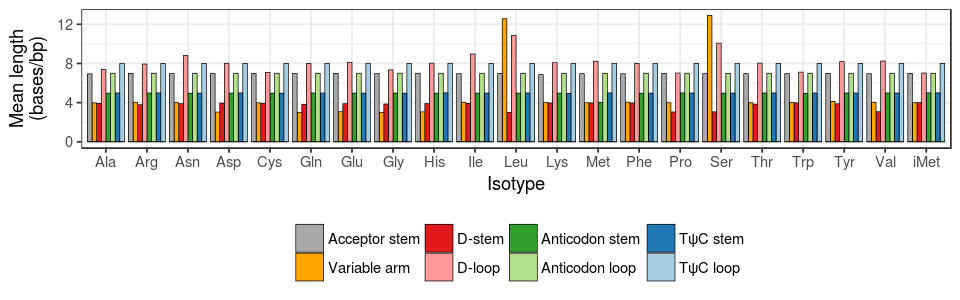

In [24]:
plot = stemloop %>% 
  mutate(region = revalue(region, c("Astem" = "Acceptor stem ", "Varm" = "Variable arm ", "Dstem" = "D-stem ", "Dloop" = "D-loop ", "Cstem" = "Anticodon stem ", "Cloop" = "Anticodon loop ", "TPCstem" = sprintf("T\u03c8C stem "), "TPCloop" = sprintf("T\u03c8C loop ")))) %>%
  mutate(region = factor(region, c("Acceptor stem ", "Variable arm ", "D-stem ", "D-loop ", "Anticodon stem ", "Anticodon loop ", sprintf("T\u03c8C stem "), sprintf("T\u03c8C loop ")))) %>%
  ggplot() + geom_bar(aes(x = isotype, y = size, fill = region), stat = 'identity', size = 0.2, color = 'black', position = 'dodge') +
    scale_fill_manual(values = c("darkgray", "orange", rev(brewer.pal(6, "Paired")))) +
    scale_y_continuous(breaks = c(0, 4, 8, 12)) +
    theme(legend.position = "bottom") +
    xlab("Isotype") + ylab("Mean length\n(bases/bp)") +
    guides(fill = guide_legend(title = NULL))

options(repr.plot.width=8, repr.plot.height=2.5)
plot
# ggsave(plot, filename = 'figS2a-stemloops.pdf', width = 8, height = 2.5, device = cairo_pdf)

In [25]:
stemloop = identities %>% filter(!restrict) %>%
  rowwise() %>%
  mutate(Astem = get_stem_length(7, paste0(resolve_match(X1.72), resolve_match(X2.71), resolve_match(X3.70), resolve_match(X4.69), resolve_match(X5.68), resolve_match(X6.67), resolve_match(X7.66))),
         Dstem = get_stem_length(4, paste0(resolve_match(X10.25), resolve_match(X11.24), resolve_match(X12.23), resolve_match(X13.22))),
         Cstem = get_stem_length(5, paste0(resolve_match(X27.43), resolve_match(X28.42), resolve_match(X29.41), resolve_match(X30.40), resolve_match(X31.39))),
         TPCstem = get_stem_length(5, paste0(resolve_match(X49.65), resolve_match(X50.64), resolve_match(X51.63), resolve_match(X52.62), resolve_match(X53.61)))) %>%
  select(isotype, clade, Astem, Dstem, D.loop, Cstem, AC.loop, V.arm, TPCstem, TPC.loop) %>%
  group_by(isotype, clade) %>%
  summarize(Astem = mean(Astem, na.rm = TRUE), Dstem = mean(Dstem), Dloop = mean(D.loop), Cstem = mean(Cstem), Cloop = mean(AC.loop), TPCloop = mean(TPC.loop), TPCstem = mean(TPCstem), Varm = mean(V.arm)) %>%
  gather(region, size, -isotype, -clade) %>%
  mutate(region = factor(region)) %>% 
  ungroup

stemloop = rbind(stemloop, cbind(expand.grid(isotype = unique(stemloop$isotype), clade = unique(stemloop$clade), region = levels(stemloop$region)), size=0))

In [26]:
plot = stemloop %>% 
  mutate(region = revalue(region, c("Astem" = "Acceptor stem ", "Varm" = "Variable arm ", "Dstem" = "D-stem ", "Dloop" = "D-loop ", "Cstem" = "Anticodon stem ", "Cloop" = "Anticodon loop ", "TPCstem" = sprintf("T\u03c8C stem "), "TPCloop" = sprintf("T\u03c8C loop ")))) %>%
  mutate(region = factor(region, c("Acceptor stem ", "Variable arm ", "D-stem ", "D-loop ", "Anticodon stem ", "Anticodon loop ", sprintf("T\u03c8C stem "), sprintf("T\u03c8C loop ")))) %>%
  ggplot() + geom_bar(aes(x = isotype, y = size, fill = region), stat = 'identity', size = 0.2, color = 'black', position = 'dodge') +
    facet_wrap(~ clade, scales = "free") +
    scale_fill_manual(values = c("darkgray", "orange", rev(brewer.pal(6, "Paired")))) +
    scale_y_continuous(breaks = c(0, 4, 8, 12)) +
    theme(legend.position = "bottom") +
    xlab("Isotype") + ylab("Mean length (bases/bp)") +
    guides(fill = guide_legend(title = NULL))

# options(repr.plot.width=24, repr.plot.height=5)
# plot
ggsave(plot, filename = 'figS7a-clade-stemloops.pdf', width = 24, height = 5, device = cairo_pdf)

## D loop insertions

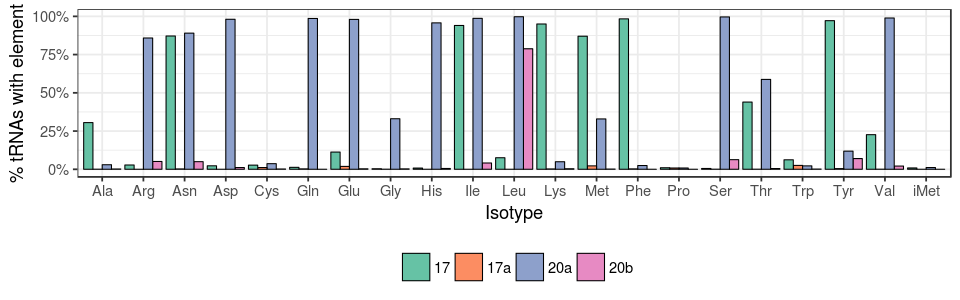

In [27]:
plot = identities %>% filter(!restrict) %>%
  select(isotype, clade, X17, X17a, X20a, X20b) %>%
  mutate(X17 = X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  group_by(isotype) %>%
  summarize(`17` = mean(X17), `17a` = mean(X17a), `20a` = mean(X20a), `20b` = mean(X20b)) %>%
  gather(position, freq, -isotype) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = position), stat = 'identity', color = 'black', size = 0.3, position = 'dodge') +
    scale_y_continuous(labels = percent_format()) +
    scale_fill_manual(values = brewer.pal(4, "Set2")) +
    theme(legend.position = "bottom") +
    labs(x = "Isotype", y = "% tRNAs with element") +
    guides(fill = guide_legend(title = NULL))

options(repr.plot.width=8, repr.plot.height=2.5)
plot
ggsave(filename = 'figS2b-dloop-insertions.pdf', plot = plot, width = 8, height = 2.5)

In [28]:
plot = identities %>% filter(!restrict) %>%
  select(isotype, clade, X17, X17a, X20a, X20b) %>%
  mutate(X17 = X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  group_by(isotype, clade) %>%
  summarize(`17` = mean(X17), `17a` = mean(X17a), `20a` = mean(X20a), `20b` = mean(X20b)) %>%
  gather(position, freq, -isotype, -clade) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = position), stat = 'identity', color = 'black', size = 0.3, position = 'dodge') +
    facet_wrap(~ clade, scales = "free") +
    scale_y_continuous(labels = percent_format()) +
    scale_fill_manual(values = brewer.pal(4, "Set2")) +
    theme(legend.position = "bottom") +
    labs(x = "Isotype", y = "% tRNAs with element") +
    guides(fill = guide_legend(title = NULL))

# options(repr.plot.width=24, repr.plot.height=5)
# plot
ggsave(filename = 'figS7b-clade-dloop-insertions.pdf', plot = plot, width = 24, height = 5)

## Intron length

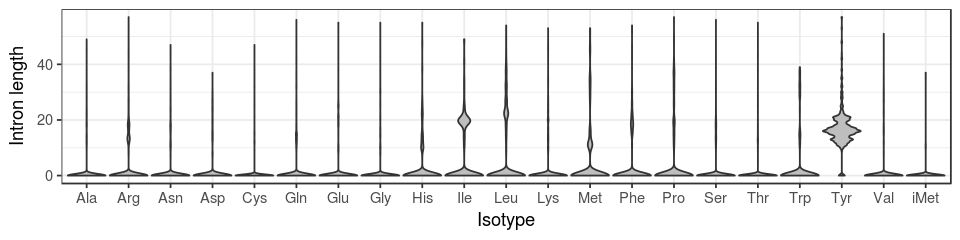

In [29]:
intron_cutoff = identities %>% filter(!restrict) %>% group_by(isotype) %>%
  summarize(quantile = quantile(intron, p = 0.97)) %>%
  summarize(max(quantile)) %>% unlist %>% unname

plot = identities %>% filter(!restrict, intron < intron_cutoff) %>% select(isotype, clade, intron) %>%
  ggplot() + geom_violin(aes(x = isotype, y = intron), fill = 'gray', scale = 'width', adjust = 0.5) +
    theme(legend.position = "none") +
    labs(y = "Intron length", x = "Isotype")

options(repr.plot.width=8, repr.plot.height=2)
plot
ggsave(filename = 'figS2c-introns.pdf', plot = plot, width = 8, height = 2)

In [30]:
intron_cutoff = identities %>% filter(!restrict) %>% group_by(isotype, clade) %>%
  summarize(quantile = quantile(intron, p = 0.97)) %>%
  summarize(max(quantile)) %>% unlist %>% unname

plot = identities %>% filter(!restrict, intron < intron_cutoff) %>% select(isotype, clade, intron) %>%
  ggplot() + geom_violin(aes(x = isotype, y = intron, fill = clade), scale = 'width', adjust = 0.5) +
    facet_wrap(~ clade, scales = "free_x") + 
    theme(legend.position = "none") +
    labs(y = "Intron length", x = "Isotype")

# options(repr.plot.width=24, repr.plot.height=5)
# plot
ggsave(filename = 'figS7c-clade-introns.pdf', plot = plot, width = 24, height = 5)

## N1 and N73 identity

In [31]:
n1n73 = identities %>% filter(!restrict) %>%
  select(isotype, X1, X73)%>%
  gather(position, identity, X1, X73) %>%
  mutate(position = revalue(position, c('X1' = 'N1', 'X73' = 'N73'))) %>%
  filter(identity %in% c("A", "C", "G", "U")) %>%
  group_by(isotype, position, identity) %>%
  summarize(count = n()) %>%
  group_by(isotype, position) %>%
  mutate(freq = count/sum(count))

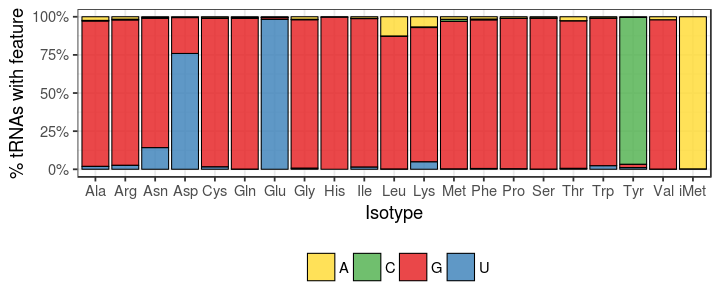

In [32]:
plot = n1n73 %>% filter(position == "N1") %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, alpha = 0.8, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    theme(legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

options(repr.plot.width=6, repr.plot.height=2.5)
plot
ggsave(filename = 'figS2d-N1.pdf', plot = plot, width = 6, height = 2.5)

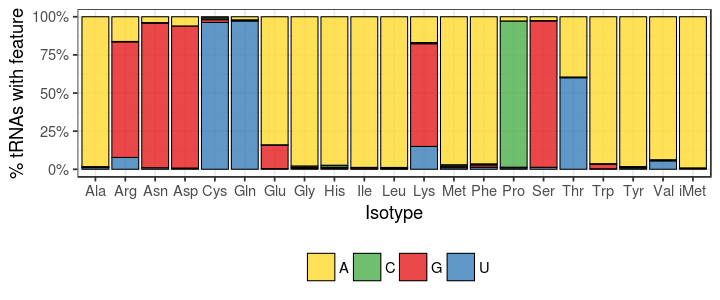

In [33]:
plot = n1n73 %>% filter(position == "N73") %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, alpha = 0.8, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    theme(legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

options(repr.plot.width=6, repr.plot.height=2.5)
plot
ggsave(filename = 'figS2e-N73.pdf', plot = plot, width = 6, height = 2.5)

In [34]:
n1n73 = identities %>% filter(!restrict) %>%
  select(isotype, clade, X1, X73)%>%
  gather(position, identity, X1, X73, -clade) %>%
  mutate(position = revalue(position, c('X1' = 'N1', 'X73' = 'N73'))) %>%
  filter(identity %in% c("A", "C", "G", "U")) %>%
  group_by(isotype, clade, position, identity) %>%
  summarize(count = n()) %>%
  group_by(isotype, clade, position) %>%
  mutate(freq = count/sum(count))

In [35]:
plot = n1n73 %>% filter(position == "N1") %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, alpha = 0.8, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    facet_wrap(~ clade, scales = 'free') +
    theme(legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

# options(repr.plot.width=20, repr.plot.height=5)
# plot
ggsave(filename = 'figS7d-clade-N1.pdf', plot = plot, width = 20, height = 5)

In [36]:
plot = n1n73 %>% filter(position == "N73") %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, alpha = 0.8, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    facet_wrap(~ clade, scales = 'free') +
    theme(legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

# options(repr.plot.width=20, repr.plot.height=5)
# plot
ggsave(filename = 'figS7e-clade-N73.pdf', plot = plot, width = 20, height = 5)

## A and B box base frequencies

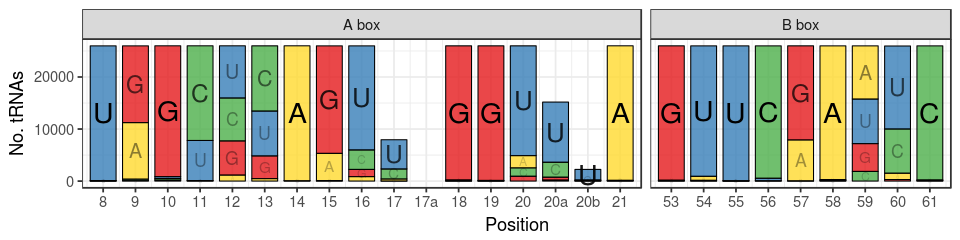

In [37]:
ab_positions = c('X8'='8', 'X9'='9', 'X10'='10', 'X11'='11', 'X12'='12', 'X13'='13', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X53'='53', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X61'='61')

plot = identities %>% 
  filter(!restrict) %>%
  select(isotype, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  gather(Position, Identity, -isotype) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(Position, Identity) %>%
  summarize(Count = n()) %>%
  group_by(Position) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  mutate(order = rank(Count)) %>% 
  arrange(order) %>% 
  mutate(ymax = cumsum(Count),
         xmin = as.integer(Position) - 0.4,
         xmax = as.integer(Position) + 0.4) %>%
  mutate(ymin = ifelse(order == 1, 0, as.numeric(lag(ymax)))) %>%
  ungroup %>%
  ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), alpha = 0.8, color = 'black', size = 0.3) +
    geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
    facet_grid(~ feature, space = 'free', scales = 'free') +
    scale_x_continuous(expand = c(0, 0.25), breaks = 1:26, labels = c('8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '53', '54', '55', '56', '57', '58', '59', '60', '61')) +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(legend.position='none') +
    labs(fill = '', x = 'Position', y = 'No. tRNAs')

options(repr.plot.width=8, repr.plot.height=2)
plot
ggsave(plot, filename = 'figS2f-ABbox.pdf', width = 8, height = 2)

In [38]:
df = identities %>% 
  filter(!restrict) %>%
  select(isotype, clade, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  gather(Position, Identity, -isotype, -clade) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(Position, Identity, clade) %>%
  summarize(Count = n()) %>%
  group_by(Position, clade) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  mutate(order = rank(Count)) %>% 
  arrange(order) %>% 
  mutate(ymax = cumsum(Count),
         xmin = as.integer(Position) - 0.4,
         xmax = as.integer(Position) + 0.4) %>%
  mutate(ymin = ifelse(order == 1, 0, as.numeric(lag(ymax)))) %>%
  ungroup

plot = arrangeGrob(df %>% filter(clade %in% c("Fungi", "Nematode")) %>%
                      ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), alpha = 0.8, color = 'black', size = 0.3) +
                        geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
                        facet_grid(clade ~ feature, scales = 'free', space = 'free_x') +
                        scale_x_continuous(expand = c(0, 0.25), breaks = 1:26, labels = c('8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '53', '54', '55', '56', '57', '58', '59', '60', '61')) +
                        scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
                        theme(legend.position='none') +
                        labs(fill = '', x = '', y = 'No. tRNAs'),
                    df %>% filter(clade %in% c("Insect", "Plant")) %>%
                      ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), alpha = 0.8, color = 'black', size = 0.3) +
                        geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
                        facet_grid(clade ~ feature, scales = 'free', space = 'free_x') +
                        scale_x_continuous(expand = c(0, 0.25), breaks = 1:26, labels = c('8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '53', '54', '55', '56', '57', '58', '59', '60', '61')) +
                        scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
                        theme(legend.position='none') +
                        labs(fill = '', x = 'Position', y = NULL),
                    df %>% filter(clade %in% c("Mammal", "Vertebrate")) %>%
                      ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), alpha = 0.8, color = 'black', size = 0.3) +
                        geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
                        facet_grid(clade ~ feature, scales = 'free', space = 'free_x') +
                        scale_x_continuous(expand = c(0, 0.25), breaks = 1:26, labels = c('8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '53', '54', '55', '56', '57', '58', '59', '60', '61')) +
                        scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
                        theme(legend.position='none') +
                        labs(fill = '', x = '', y = NULL),
                    ncol = 3)

# options(repr.plot.width=24, repr.plot.height=4)
# grid.arrange(plot)
ggsave(plot, filename = 'figS7f-clade-ABbox.pdf', width = 24, height = 4)

## Anticodon usage

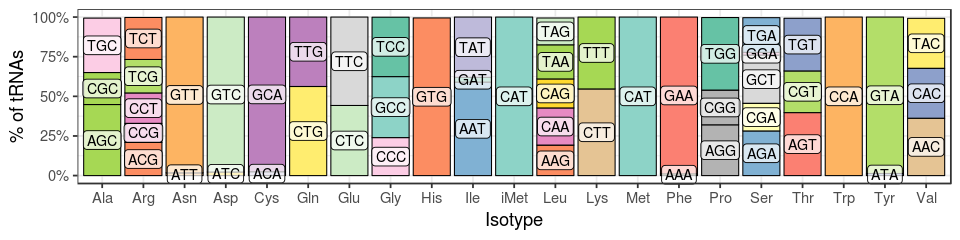

In [39]:
plot = identities %>% 
  filter(!restrict) %>%
  mutate(isotype = factor(isotype, levels = isotypes)) %>%
  group_by(isotype, anticodon) %>%
  summarize(count = n()) %>%
  group_by(isotype) %>%
  mutate(freq = count/sum(count)) %>%
  filter(freq > 0.01) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = anticodon), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = isotype, y = freq, label = anticodon), label.padding = unit(0.16, "lines"), alpha = 0.7, position = position_stack(vjust = 0.5, reverse = FALSE), size = 3) +
    theme(legend.position = "none") + 
    labs(x = 'Isotype', y = '% of tRNAs') +
    scale_fill_manual(values = sample(rep(x = c(brewer.pal(8, "Set2"), brewer.pal(12, "Set3")), 4), replace = FALSE)) + 
    scale_y_continuous(labels = percent)

options(repr.plot.width=8, repr.plot.height=2)
plot
ggsave(filename = 'figS2g-anticodon.pdf', plot = plot, width = 8, height = 2)

In [40]:
plot = identities %>% 
  filter(!restrict) %>%
  group_by(isotype, clade, anticodon) %>%
  summarize(count = n()) %>%
  group_by(isotype, clade) %>%
  mutate(freq = count/sum(count)) %>%
  filter(freq > 0.01) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = anticodon), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = isotype, y = freq, label = anticodon), label.padding = unit(0.16, "lines"), alpha = 0.7, position = position_stack(vjust = 0.5, reverse = FALSE), size = 3) +
    facet_wrap(~ clade, scales = "free") +
    theme(legend.position = "none") + 
    labs(x = 'Isotype', y = '% of tRNAs') +
    scale_fill_manual(values = sample(rep(x = c(brewer.pal(8, "Set2"), brewer.pal(12, "Set3")), 4), replace = FALSE)) + 
    scale_y_continuous(labels = percent)

# options(repr.plot.width=24, repr.plot.height=5)
# plot
ggsave(filename = 'figS7g-clade-anticodon.pdf', plot = plot, width = 24, height = 5)

## Feature distributions

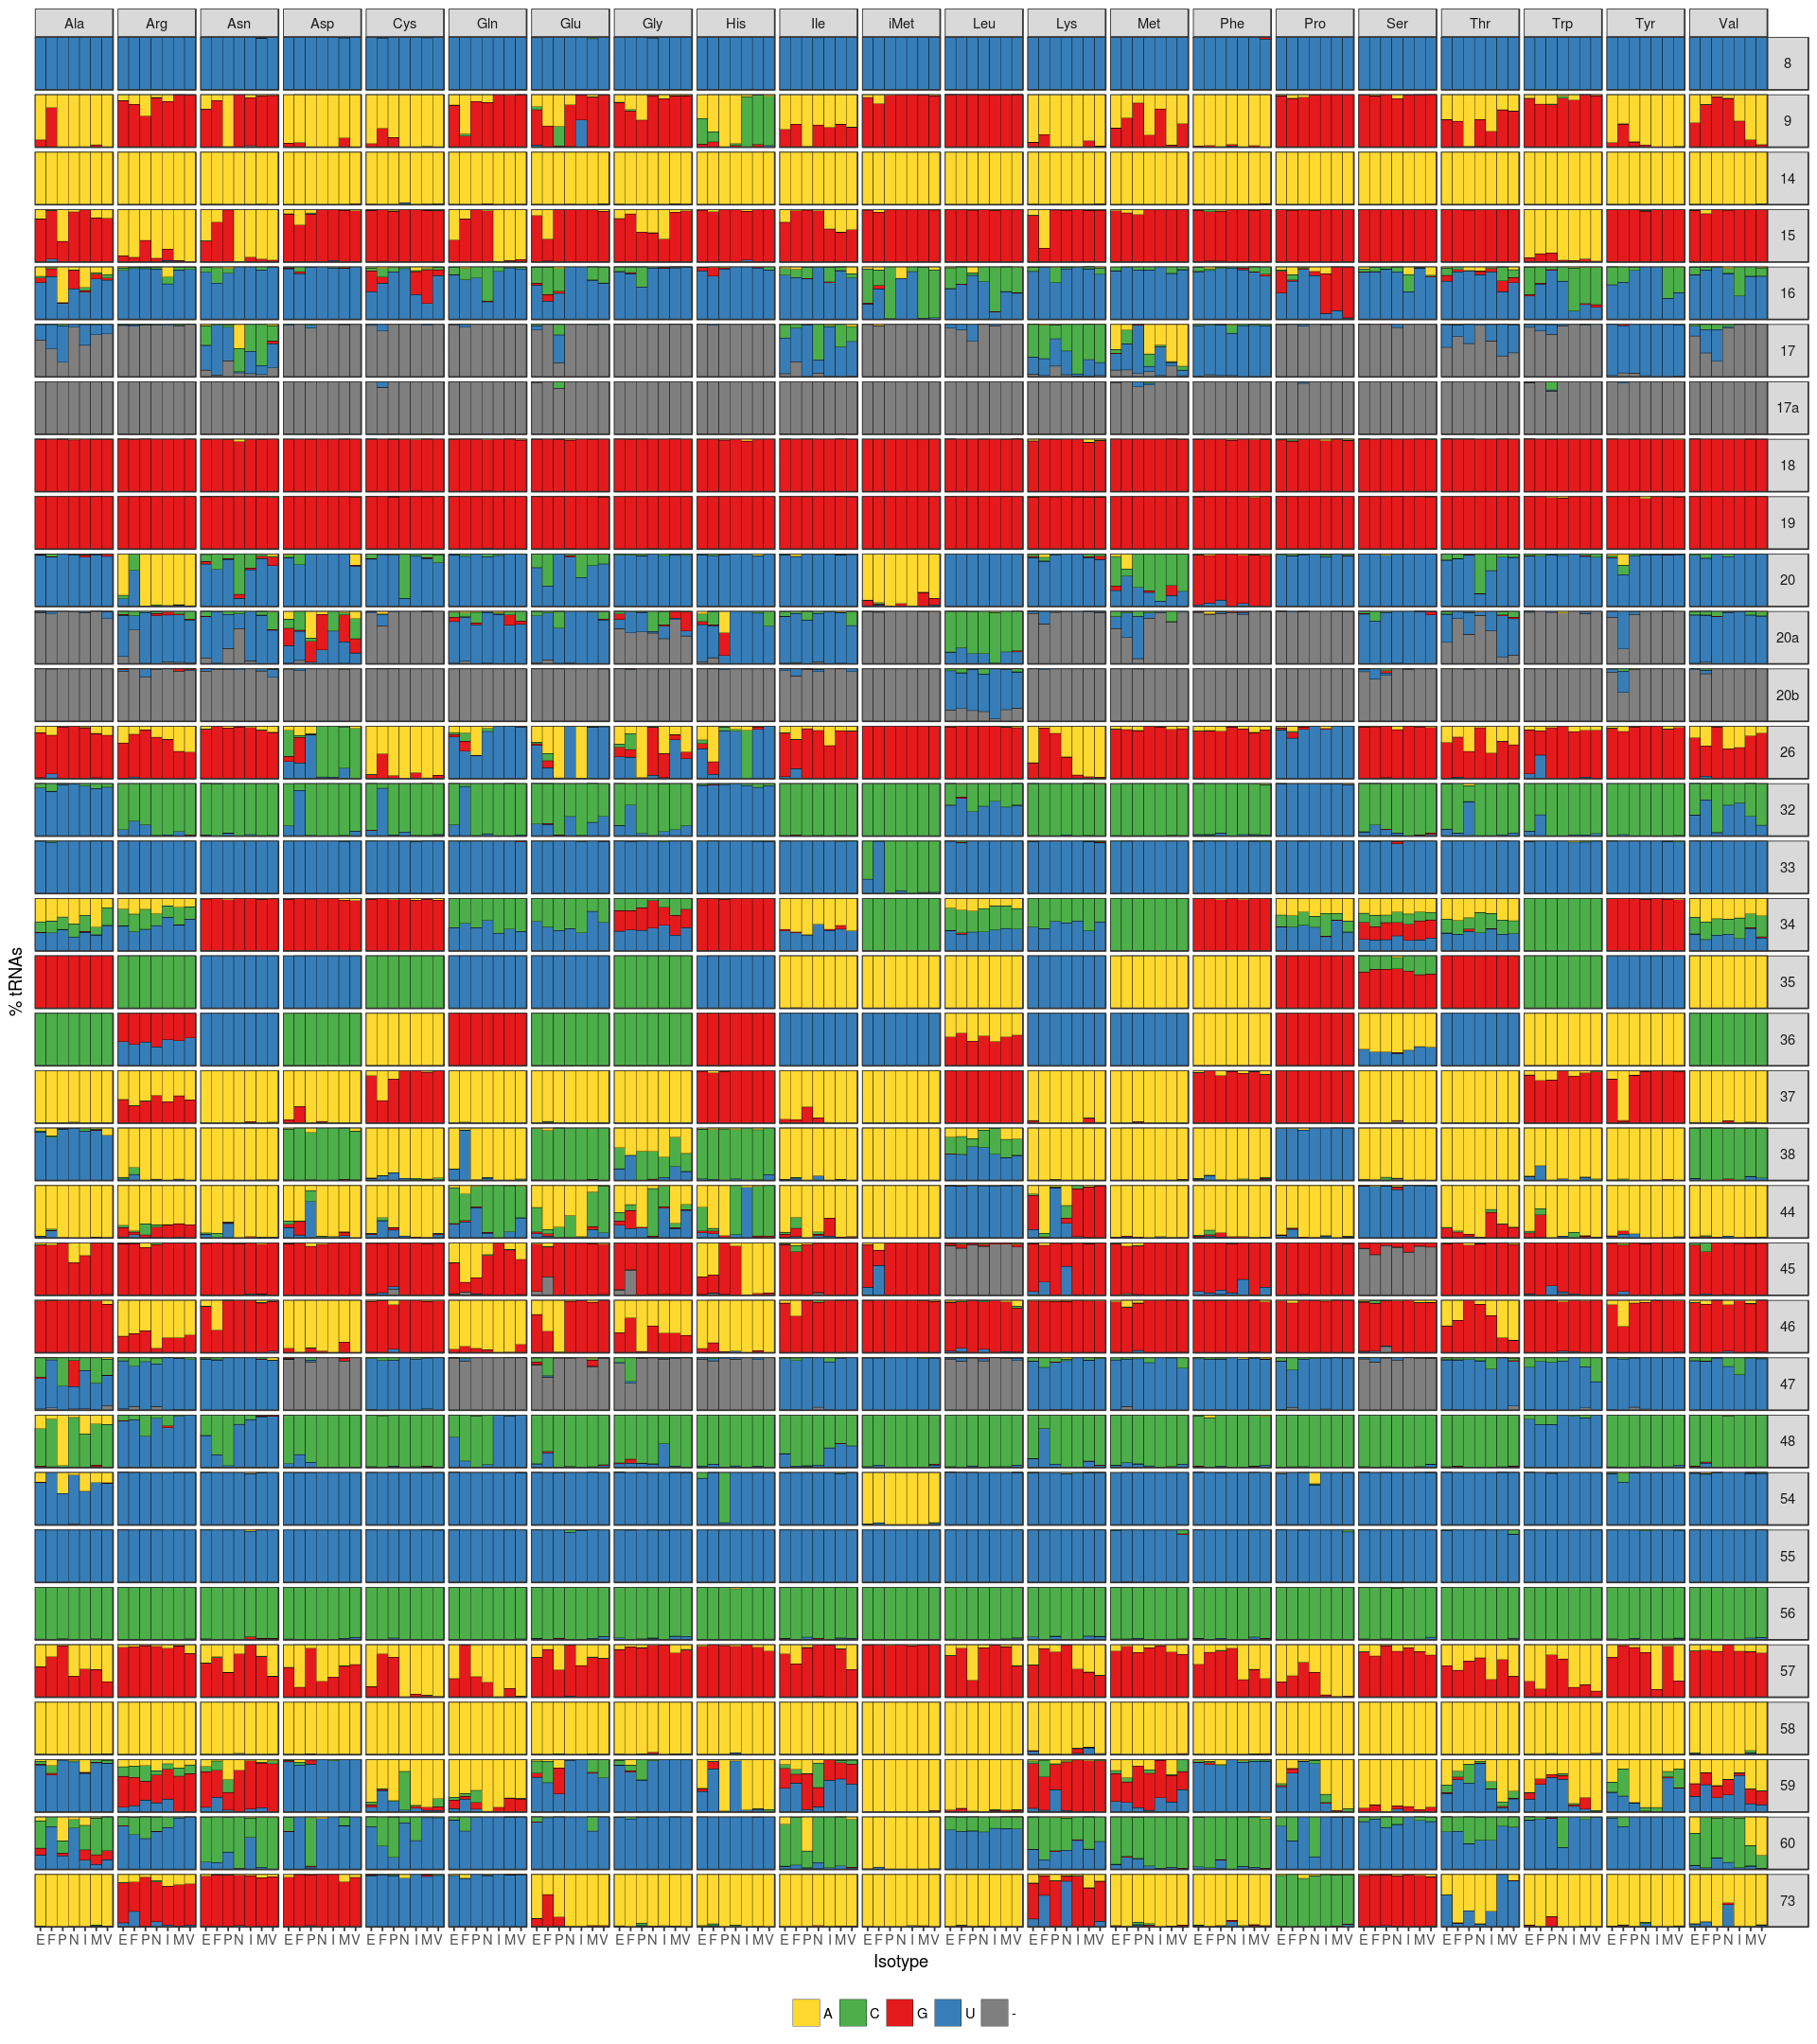

In [41]:
plot = identities %>% filter(!restrict) %>%
  select(isotype, clade, X8, X9, X14, X15, X16, X17, X17a, X18, X19, X20, X20a, X20b, X26, X32, X33, X34, X35, X36, X37, X38, X44, X45, X46, X47, X48, X54, X55, X56, X57, X58, X59, X60, X73) %>%
  rbind(identities %>% filter(!restrict) %>%
    select(isotype, X8, X9, X14, X15, X16, X17, X17a, X18, X19, X20, X20a, X20b, X26, X32, X33, X34, X35, X36, X37, X38, X44, X45, X46, X47, X48, X54, X55, X56, X57, X58, X59, X60, X73) %>%
    mutate(clade = 'All')) %>%
  gather(positions, identity, -isotype, -clade) %>%
  filter(identity %in% c("A", "C", "G", "U", "-")) %>%
  group_by(isotype, clade, positions) %>%
  mutate(freq = n()) %>% 
  ungroup() %>%
  count(isotype, clade, positions, identity, freq) %>%
  mutate(freq = n/freq) %>% 
  ungroup() %>%
  mutate(positions = revalue(positions, c('X8' = '8', 'X9' = '9', 'X14' = '14', 'X15' = '15', 'X16' = '16', 'X17' = '17', 'X17a' = '17a', 'X18' = '18', 'X19' = '19', 'X20' = '20', 'X20a' = '20a', 'X20b' = '20b', 'X26' = '26', 'X32' = '32', 'X33' = '33', 'X34' = '34', 'X35' = '35', 'X36' = '36', 'X37' = '37', 'X38' = '38', 'X44' = '44', 'X45' = '45', 'X46' = '46', 'X47' = '47', 'X48' = '48', 'X54' = '54', 'X55' = '55', 'X56' = '56', 'X57' = '57', 'X58' = '58', 'X59' = '59', 'X60' = '60', 'X73' = '73')),
         clade = revalue(clade, c("All" = "E", "Fungi" = "F", "Nematode" = "N", "Plant" = "P", "Insect" = "I", "Mammal" = "M", "Vertebrate" = "V")),
         identity = factor(identity, levels = c("A", "C", "G", "U", "-"))) %>%
  mutate(positions = factor(positions, levels = c('8', '9', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '26', '32', '33', '34', '35', '36', '37', '38', '44', '45', '46', '47', '48', '54', '55', '56', '57', '58', '59', '60', '73')),
         clade = factor(clade, levels = c("E", "F", "P", "N", "I", "M", "V")),
         isotype = factor(isotype, levels = isotypes),
         identity = revalue(identity, c('A' = 'A ', 'C' = 'C ', 'G' = 'G ', 'U' = 'U '))) %>%
  ggplot() + geom_bar(aes(x = clade, y = freq, fill = identity), color = 'black', width = 1, size = 0.1, stat = 'identity') +
    facet_grid(positions ~ isotype, scales = "free") +
    scale_fill_manual(values = c('A '='#ffd92f', 'C '='#4daf4a', 'G '='#e41a1c', 'U '='#377eb8', '-'='gray50')) + 
    scale_x_discrete(expand = c(0, 0)) +
    scale_y_continuous(labels = percent_format(), breaks = c(0.25, 0.5, 0.75, 1), expand = c(0, 0)) +
    xlab("Isotype") + ylab("% tRNAs") +
    theme(legend.position = 'bottom',
          strip.text.y = element_text(angle = 0),
          axis.ticks.y = element_blank(),
          axis.text.y = element_blank(),
          panel.spacing = unit(0.2, "lines"),
          legend.title = element_blank())

options(repr.plot.width=16, repr.plot.height=18)
plot
ggsave(plot, filename = "figS5a-base-distributions.pdf", width = 16, height = 18, dpi = 300)

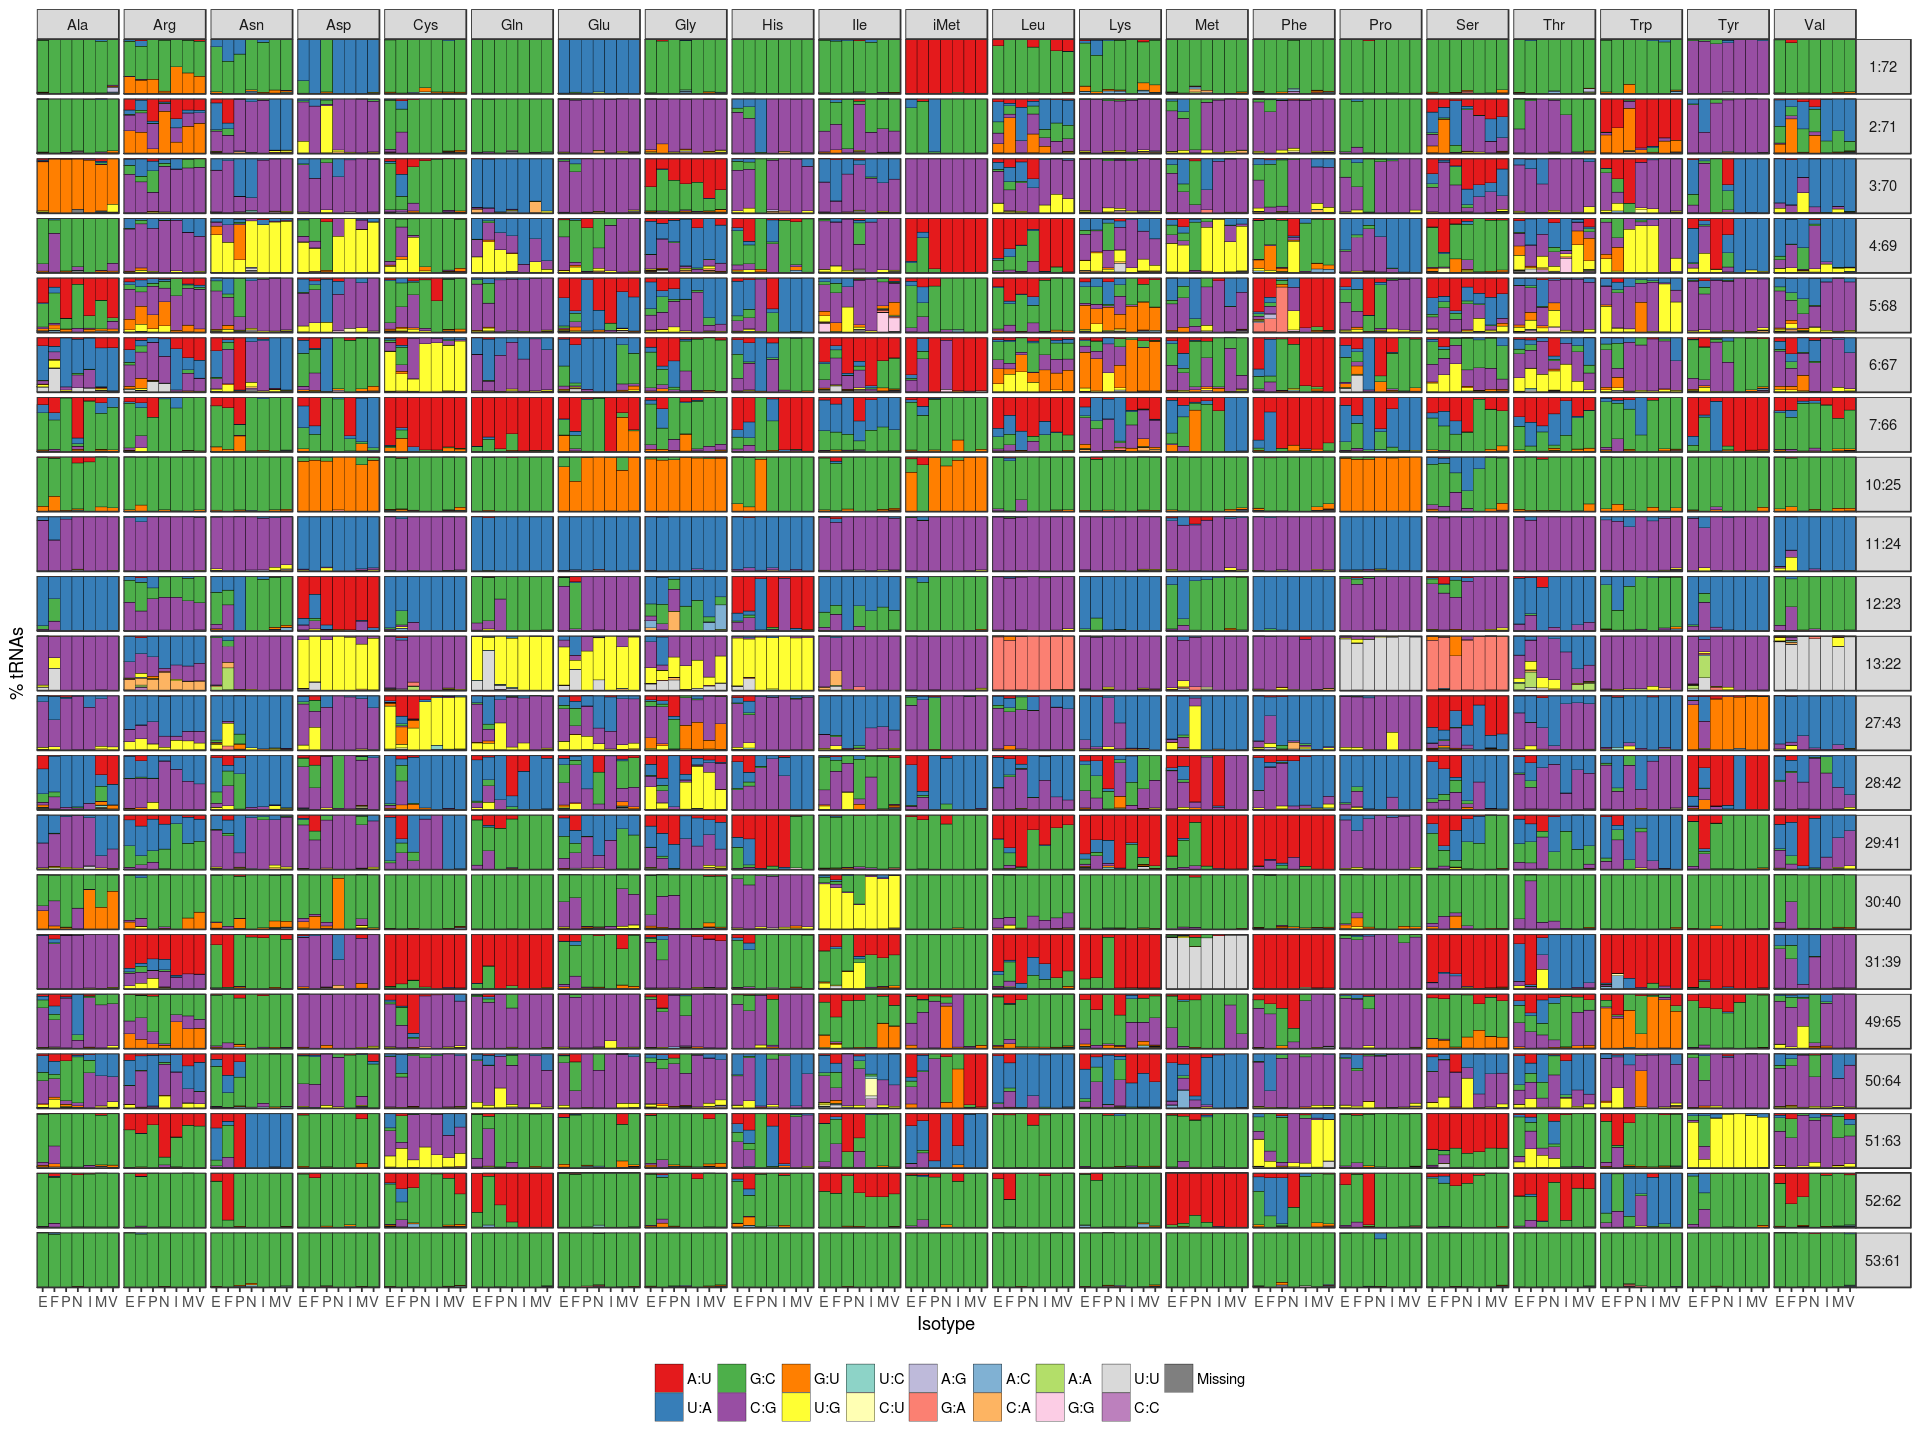

In [42]:
plot = identities %>% filter(!restrict) %>%
  select(isotype, clade, X1.72, X2.71, X3.70, X4.69, X5.68, X6.67, X7.66, X10.25, X11.24, X12.23, X13.22, X27.43, X28.42, X29.41, X30.40, X31.39, X49.65, X50.64, X51.63, X52.62, X53.61) %>%
  rbind(identities %>% filter(!restrict) %>%
    select(isotype, X1.72, X2.71, X3.70, X4.69, X5.68, X6.67, X7.66, X10.25, X11.24, X12.23, X13.22, X27.43, X28.42, X29.41, X30.40, X31.39, X49.65, X50.64, X51.63, X52.62, X53.61) %>%
    mutate(clade = 'All')) %>%
  gather(positions, identity, -isotype, -clade) %>%
  mutate(identity = ifelse(identity %in% c("A:-", "-:A", "C:-", "-:C", "G:-", "-:G", "U:-", "-:U"), "Missing", identity)) %>%
  filter(identity %in% c("A:U", "U:A", "G:C", "C:G", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "Missing", "Other")) %>%
  group_by(isotype, clade, positions) %>%
  mutate(freq = n()) %>% 
  ungroup() %>%
  count(isotype, clade, positions, identity, freq) %>%
  mutate(freq = n/freq) %>% 
  ungroup() %>%
  mutate(positions = revalue(positions, c('X1.72' = '1:72', 'X2.71' = '2:71', 'X3.70' = '3:70', 'X4.69' = '4:69', 'X5.68' = '5:68', 'X6.67' = '6:67', 'X7.66' = '7:66', 'X10.25' = '10:25', 'X11.24' = '11:24', 'X12.23' = '12:23', 'X13.22' = '13:22', 'X27.43' = '27:43', 'X28.42' = '28:42', 'X29.41' = '29:41', 'X30.40' = '30:40', 'X31.39' = '31:39', 'X49.65' = '49:65', 'X50.64' = '50:64', 'X51.63' = '51:63', 'X52.62' = '52:62', 'X53.61' = '53:61')),
         clade = revalue(clade, c("All" = "E", "Fungi" = "F", "Nematode" = "N", "Plant" = "P", "Insect" = "I", "Mammal" = "M", "Vertebrate" = "V")),
         identity = factor(identity, levels = c("A:U", "U:A", "G:C", "C:G", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "Missing", "Other"))) %>%
  mutate(positions = factor(positions, levels = c('1:72', '2:71', '3:70', '4:69', '5:68', '6:67', '7:66', '10:25', '11:24', '12:23', '13:22', '27:43', '28:42', '29:41', '30:40', '31:39', '49:65', '50:64', '51:63', '52:62', '53:61')),
         clade = factor(clade, levels = c("E", "F", "P", "N", "I", "M", "V")),
         isotype = factor(isotype, levels = isotypes),
         identity = revalue(identity, c("A:U" = "A:U ", "U:A" = "U:A ", "G:C" = "G:C ", "C:G" = "C:G ", "G:U" = "G:U ", "U:G" = "U:G ", "U:C" = "U:C ", "C:U" = "C:U ", "A:G" = "A:G ", "G:A" = "G:A ", "A:C" = "A:C ", "C:A" = "C:A ", "A:A" = "A:A ", "G:G" = "G:G ", "U:U" = "U:U ", "C:C" = "C:C "))) %>%
  ggplot() + geom_bar(aes(x = clade, y = freq, fill = identity), color = 'black', width = 1, size = 0.1, stat = 'identity') +
    facet_grid(positions ~ isotype, scales = "free") +
    scale_fill_manual(values = c(brewer.pal(6, "Set1"), brewer.pal(10, "Set3"), "gray50")) + 
    scale_x_discrete(expand = c(0, 0)) +
    scale_y_continuous(labels = percent_format(), breaks = c(0.25, 0.5, 0.75, 1), expand = c(0, 0)) +
    xlab("Isotype") + ylab("% tRNAs") +
    theme(legend.position = 'bottom',
          strip.text.y = element_text(angle = 0),
          axis.ticks.y = element_blank(),
          axis.text.y = element_blank(),
          panel.spacing = unit(0.2, "lines"),
          legend.title = element_blank()) +
    guides(fill = guide_legend(nrow = 2))

options(repr.plot.width=16, repr.plot.height=12)
plot
ggsave(plot, filename = "figS5b-pair-distributions.pdf", width = 16, height = 12, dpi = 300)

In [43]:
tertiary_interactions = identities %>% filter(!restrict) %>%
  select(isotype, clade, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
  rbind(identities %>% filter(!restrict) %>%
    select(isotype, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
    mutate(clade = 'All')) %>%
  gather(positions, identity, -isotype, -clade) %>%
  mutate(identity = ifelse(identity %in% c("A:-", "-:A", "C:-", "-:C", "G:-", "-:G", "U:-", "-:U"), "Missing", identity)) %>%
  group_by(isotype, clade, positions) %>%
  mutate(freq = n()) %>% 
  ungroup() %>%
  count(isotype, clade, positions, identity, freq) %>%
  mutate(freq = n/freq) %>% 
  ungroup() %>%
  mutate(identity = ifelse(freq < 0.05, "Other", identity)) %>%
  mutate(positions = revalue(positions, c("X8.14" = "8:14", "X9.23" = "9:23", "X10.45" = "10:45", "X15.48" = "15:48", "X18.55" = "18:55", "X19.56" = "19:56", "X22.46" = "22:46", "X26.44" = "26:44", "X54.58" = "54:58")),
         clade = revalue(clade, c("All" = "E", "Fungi" = "F", "Nematode" = "N", "Plant" = "P", "Insect" = "I", "Mammal" = "M", "Vertebrate" = "V")),
         identity = factor(identity, levels = c("A:U", "U:A", "G:C", "C:G", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "Missing", "Other"))) %>%
  mutate(identity = revalue(identity, c("A:U" = "A:U ", "U:A" = "U:A ", "G:C" = "G:C ", "C:G" = "C:G ", "G:U" = "G:U ", "U:G" = "U:G ", "U:C" = "U:C ", "C:U" = "C:U ", "A:G" = "A:G ", "G:A" = "G:A ", "A:C" = "A:C ", "C:A" = "C:A ", "A:A" = "A:A ", "G:G" = "G:G ", "C:C" = "C:C ", "U:U" = "U:U ")),
         clade = factor(clade, levels = c("E", "F", "P", "N", "I", "M", "V")),
         isotype = factor(isotype, levels = isotypes),
         positions = factor(positions, levels = c("8:14", "9:23", "10:45", "15:48", "18:55", "19:56", "22:46", "26:44", "54:58")))

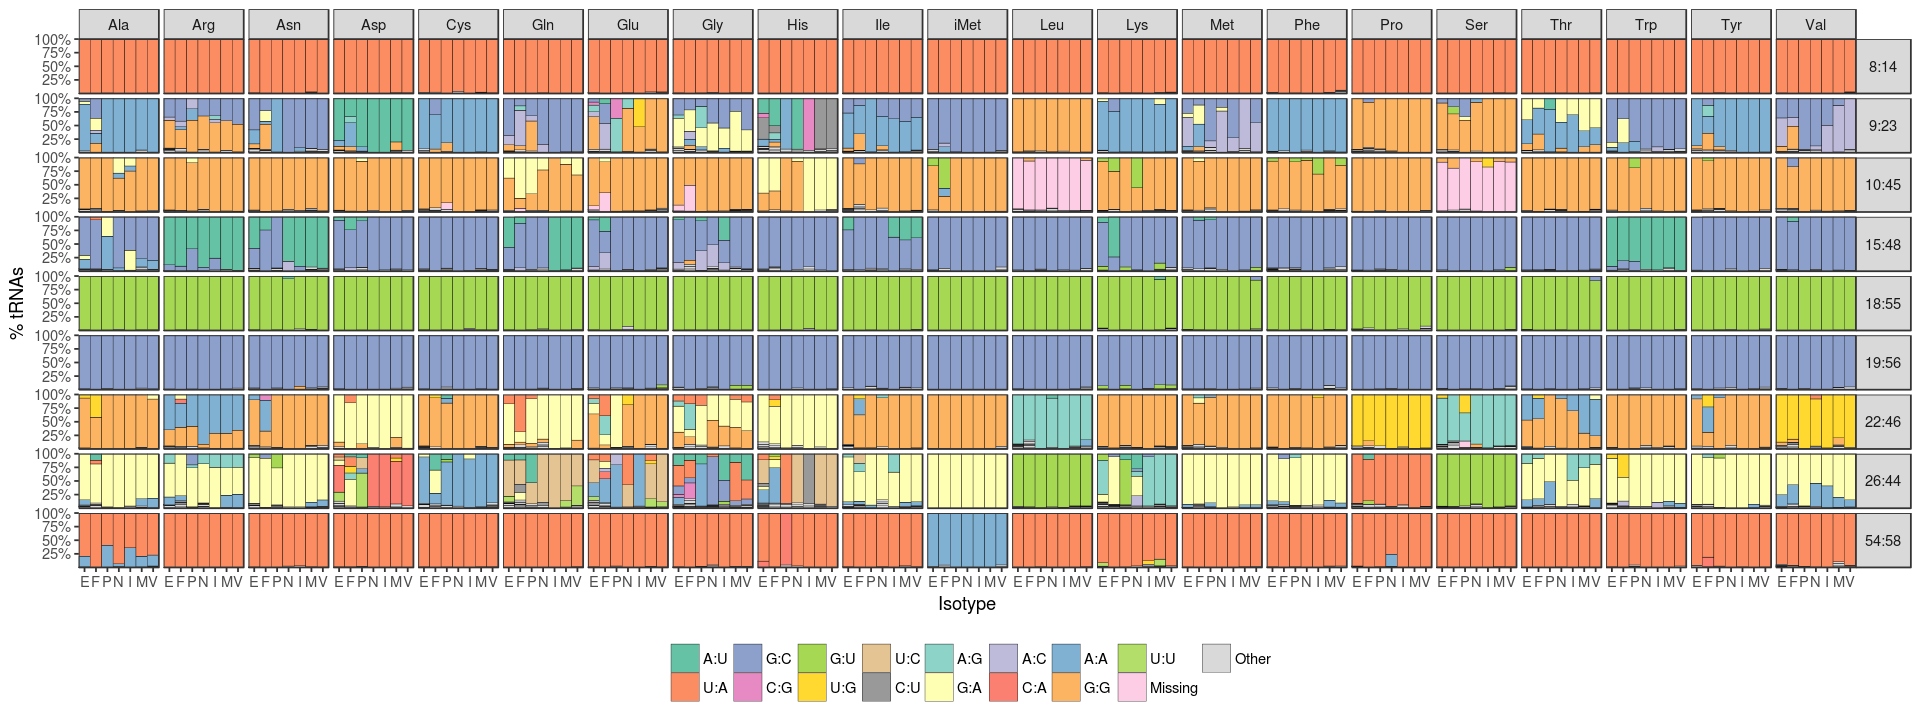

In [44]:
plot = tertiary_interactions %>% ggplot() +
  geom_bar(aes(x = clade, y = freq, fill = identity), color = 'black', width = 1, size = 0.1, stat = 'identity') +
  facet_grid(positions ~ isotype, scales = "free") +
  scale_fill_manual(values = c(brewer.pal(7, "Set2"), "gray60", brewer.pal(12, "Set3"))) + 
  scale_x_discrete(expand = c(0, 0)) +
  scale_y_continuous(labels = percent_format(), breaks = c(0.25, 0.5, 0.75, 1), expand = c(0, 0)) +
  xlab("Isotype") + ylab("% tRNAs") +
  theme(legend.position = 'bottom',
#         axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        strip.text.y = element_text(angle = 0),
        panel.spacing = unit(0.2, "lines"),
        legend.title = element_blank()) +
  guides(fill = guide_legend(nrow = 2))

options(repr.plot.width=16, repr.plot.height=6)
plot
ggsave(filename = 'figS5c-tertiary-interactions.pdf', plot = plot, width = 16, height = 6)

## Linking sequence features to synthetase evolution

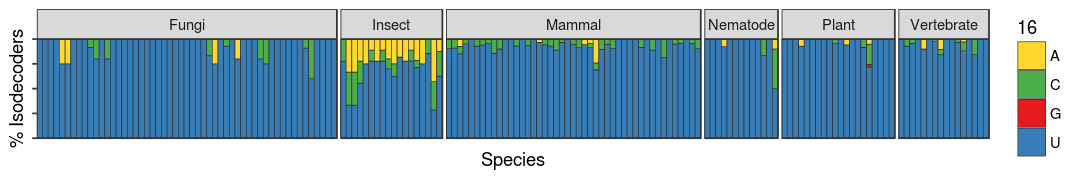

In [45]:
plot = identities %>% filter(!restrict, isotype == "Arg") %>%
  gather(Position, Feature, X16) %>%
  count(clade, abbrev, Position, Feature) %>%
  group_by(clade, abbrev, Position) %>% mutate(n = n/sum(n)) %>%
  ungroup %>%
  mutate(Feature = as.factor(Feature)) %>%
  ggplot() + geom_bar(aes(x = abbrev, y = n, fill = Feature), width = 1, color = 'gray20', size = 0.2, stat = 'identity', position = 'stack') +
    facet_grid(~ clade, scales = "free", space = "free") +
    scale_x_discrete(expand = c(0, 0)) +
    scale_y_continuous(labels = percent_format(), expand = c(0, 0)) + 
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(axis.text = element_blank(),
          axis.ticks.x = element_blank(),
          strip.text.y = element_text(angle = 0),
          panel.spacing.x = unit(0.15, "lines")) +
    guides(fill = guide_legend(title = "16")) +
    labs(x = "Species", y = "% Isodecoders")

options(repr.plot.width=9, repr.plot.height=1.5)
plot
ggsave(plot, filename = "figS6-arg16.pdf", width = 9, height = 1.5, dpi = 300)

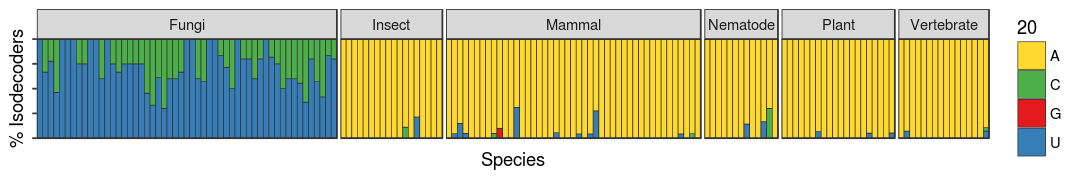

In [46]:
plot = identities %>% filter(!restrict, isotype == "Arg") %>%
  gather(Position, Feature, X20) %>%
  count(clade, abbrev, Position, Feature) %>%
  group_by(clade, abbrev, Position) %>% mutate(n = n/sum(n)) %>%
  ungroup %>%
  ggplot() + geom_bar(aes(x = abbrev, y = n, fill = Feature), width = 1, color = 'gray20', size = 0.2, stat = 'identity', position = 'stack') +
    facet_grid(~ clade, scales = "free", space = "free") +
    scale_x_discrete(expand = c(0, 0)) +
    scale_y_continuous(labels = percent_format(), expand = c(0, 0)) + 
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(axis.text = element_blank(),
          axis.ticks.x = element_blank(),
          strip.text.y = element_text(angle = 0),
          panel.spacing.x = unit(0.15, "lines")) +
    guides(fill = guide_legend(title = "20")) +
    labs(x = "Species", y = "% Isodecoders")

options(repr.plot.width=9, repr.plot.height=1.5)
plot
ggsave(plot, filename = "figS6-arg20.pdf", width = 9, height = 1.5, dpi = 300)

## Identity stories

### Fungi Gly 2:71

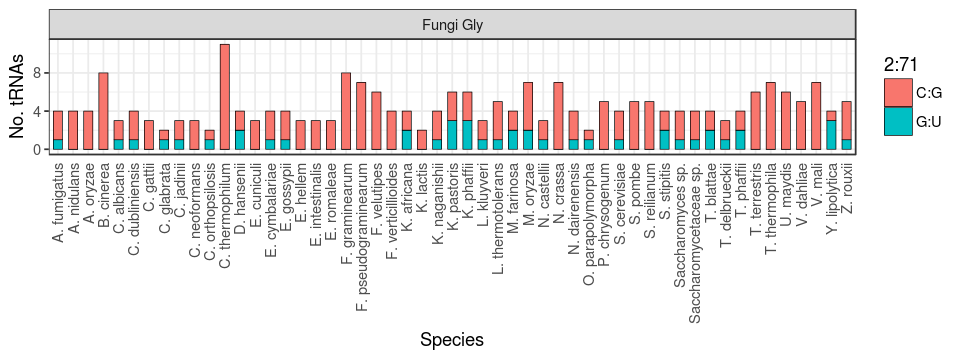

In [49]:
plot = identities %>% filter(!restrict, clade == "Fungi", isotype == "Gly") %>%
  mutate(clade = "Fungi Gly") %>%
  group_by(abbrev) %>% filter(species_long == species_long[1]) %>%
  count(abbrev, clade, X2.71) %>% spread(X2.71, n, 0) %>%
  gather(`2:71`, n, -abbrev, -clade, -`G:C`, -`A:U`) %>%
  group_by(abbrev, clade, `A:U`, `G:C`, `2:71`) %>%
  summarize(n = mean(n)) %>%
  ggplot() + geom_bar(aes(x = abbrev, y = n, fill = `2:71`), color = 'black', width = 0.6, size = 0.2, stat = 'identity') +
    facet_wrap(~ clade) +
    scale_y_continuous(breaks = c(0, 4, 8, 12)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
          axis.ticks.x = element_blank()) + 
    guides(fill = guide_legend(title = "2:71")) +
    labs(x = "Species", y = "No. tRNAs")

options(repr.plot.width=8, repr.plot.height=3)
plot
ggsave(plot, filename = "figS3a-Gly-2-71.pdf", width = 8, height = 3, dpi = 300)

## Leu/Ser variable arm lengths

In [ ]:
plot = identities %>% filter(!restrict, isotype %in% c("Leu", "Ser")) %>%
  rbind(identities %>% filter(!restrict, isotype %in% c("Leu", "Ser")) %>% mutate(clade = "All")) %>%
  select(isotype, clade, D.loop, V.arm) %>%
  filter(D.loop < 12, D.loop > 7, V.arm < 21, V.arm > 7) %>% 
  mutate(clade = relevel(clade, "All")) %>%
  ggplot() + geom_density(aes(x = V.arm, fill = clade, color = clade), alpha = 0.7) + 
    facet_wrap(~ paste(clade, isotype), nrow = 7, scales = "free_y") +
    scale_x_continuous(breaks = c(9, 12, 15, 18)) +
    theme(legend.position = "none",
          panel.spacing = unit(0.2, "lines"),
          strip.text.y = element_text(angle = 0)) +
    guides(fill = guide_legend(nrow = 2)) +
    labs(x = "Variable arm length", y = "Density")

In [ ]:
options(repr.plot.width=6, repr.plot.height=7)
plot
ggsave(plot, filename = "figS3b-varm-length.pdf", width = 6, height = 7, dpi = 300)

## Exceptions to G29:C41 in fungi and nematode species

In [ ]:
plot = identities %>% filter(isotype == "iMet", clade %in% c("Fungi", "Nematode")) %>%
  group_by(abbrev) %>% filter(species_long == species_long[1]) %>%
  mutate(clade = paste(clade, "iMet")) %>%
  count(X29.41, abbrev, clade) %>%
  filter(X29.41 %in% c("A:U", "G:C")) %>%
  ungroup %>%
  group_by(abbrev, X29.41, clade) %>%
  summarize(n = mean(n)) %>%
  ggplot() + geom_bar(aes(x = abbrev, y = n, fill = X29.41), width = 0.6, size = 0.2, color = 'black', stat = 'identity') +
    facet_grid(~ clade, scales = "free", space = "free") +
    scale_y_continuous(breaks = c(0, 4, 8, 12)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
          axis.ticks.x = element_blank(),
          panel.spacing.x = unit(-0.05, "lines")) +
    guides(fill = guide_legend(title = "29:41")) +
    labs(x = "Species", y = "No. tRNAs")

options(repr.plot.width=8, repr.plot.height=3)
plot
ggsave(plot, filename = "figS3c-29-41-exceptions.pdf", width = 8, height = 3, dpi = 300)

## Relaxing of G53:C61 in nematode species

In [ ]:
plot = identities %>% filter(!restrict, isotype == "Pro", clade == "Nematode") %>%
  count(X53.61, abbrev, clade) %>%
  ungroup %>%
  group_by(abbrev, X53.61, clade) %>%
  summarize(n = mean(n)) %>%
  ggplot() + geom_bar(aes(x = abbrev, y = n, fill = X53.61), width = 0.6, size = 0.2, color = 'black', stat = 'identity') +
    facet_grid(~ clade, scales = "free", space = "free") +
    scale_y_continuous(breaks = c(0, 4, 8, 12)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
          axis.ticks.x = element_blank()) +
    guides(fill = guide_legend(title = "53:61")) +
    labs(x = "Species", y = "No. isodecoders")

options(repr.plot.width=3, repr.plot.height=3)
plot
ggsave(plot, filename = "figS3d-53-61-relaxed.pdf", width = 3, height = 3, dpi = 300)

## R9 and Y9 enrichment in Glu and His

In [ ]:
plot = identities %>% filter(!restrict) %>%
  filter(X12.23 %in% c("U:A", "G:C", "C:G", "A:U"), isotype %in% c("His", "Gly")) %>%
  mutate(purine = ifelse(X9 %in% c("A", "G"), "R9", ifelse(X9 != "-", "Y9", "-9"))) %>%
  filter(purine != "-9") %>%
  mutate(species_long = str_extract(species_long, "^\\w+ \\w+")) %>%
  count(isotype, clade, purine, X12.23) %>%
  group_by(isotype, clade, purine) %>%
  mutate(n = n / sum(n),
         X12.23 = factor(X12.23, levels = c("G:C", "C:G", "A:U", "U:A"))) %>%
  spread(purine, n, 0) %>% gather(purine, n, -isotype, -X12.23, -clade) %>% 
  ggplot() + geom_bar(aes(x = purine, y = n, fill = X12.23), width = 1, size = 0.2, color = 'black', stat = 'identity') +
    facet_grid(isotype ~ clade, scales = "free_x") +
    scale_y_continuous(labels = percent_format()) +
    scale_fill_manual(values = c(brewer.pal(4, "Set1"))) + 
    theme(axis.title.x = element_blank(),
          strip.text.y = element_text(angle = 0),
          panel.spacing = unit(0.2, "lines")) + 
    labs(y = "% Isodecoders") +
    guides(fill = guide_legend(title = "12:23"))

options(repr.plot.width=6, repr.plot.height=3)
plot
ggsave(plot, filename = 'figS3e-Y9-enrichment.pdf', width = 6, height = 3)

## Fungal Phe15 and Phe20

In [ ]:
plot = identities %>% filter(!restrict, isotype == "Phe") %>%
  mutate(clade = ifelse(clade == "Fungi", "Fungi", "Other")) %>%
  count(isotype, clade, abbrev, X15) %>%
  ungroup %>%
  group_by(clade, isotype, abbrev) %>%
  mutate(n = n/sum(n)) %>%
  droplevels %>%
  ggplot() + geom_bar(aes(x = abbrev, y = n, fill = X15), width = 1, color = 'gray20', size = 0.2, stat = 'identity', position = 'stack') +
    facet_grid( ~ clade, scales = "free", space = "free") +
    scale_y_continuous(expand = c(0, 0)) +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(axis.text = element_blank(),
          axis.ticks.x = element_blank(),
          strip.text.y = element_text(angle = 0),
          panel.spacing.x = unit(0.15, "lines")) +
    guides(fill = guide_legend(title = "15")) +
    labs(x = "Species", y = "% Isodecoders")

options(repr.plot.width=8, repr.plot.height=1.5)
plot
ggsave(plot, filename = "figS3f-Phe15.pdf", width = 8, height = 1.5, dpi = 300)

In [ ]:
plot = identities %>% filter(!restrict, isotype == "Phe") %>%
  mutate(clade = ifelse(clade %in% c("Fungi", "Plant", "Insect"), as.character(clade), "Other")) %>%
  mutate(clade = factor(clade, levels = c("Fungi", "Insect", "Plant", "Other"))) %>%
  count(isotype, clade, abbrev, X20) %>%
  group_by(clade, isotype, abbrev) %>%
  mutate(n = n/sum(n)) %>%
  ggplot() + geom_bar(aes(x = abbrev, y = n, fill = X20), width = 1, color = 'gray20', size = 0.2, stat = 'identity', position = 'stack') +
    facet_grid( ~ clade, scales = "free", space = "free") +
    scale_y_continuous(expand = c(0, 0)) + 
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(axis.text = element_blank(),
          axis.ticks.x = element_blank(),
          strip.text.y = element_text(angle = 0),
          panel.spacing.x = unit(0.15, "lines")) +
    guides(fill = guide_legend(title = "20")) +
    labs(x = "Species", y = "% Isodecoders")

options(repr.plot.width=8, repr.plot.height=1.5)
plot
ggsave(plot, filename = "figS3g-Phe20.pdf", width = 8, height = 1.5, dpi = 300)

## Clade-clade comparisons

In [ ]:
clade_bits = data.frame()
clades = c('Fungi', 'Insect', 'Nematode', 'Plant', 'Vertebrate', 'Mammal')
for (clade1 in clades) {
  for (clade2 in clades) {
    if (clade1 == clade2) next
    clade_bits = rbind(clade_bits, compare_clade_bits(clade1, clade2) %>% mutate(Model = clade1, Clade = clade2))
  }
}

In [ ]:
subfigures = c('a' = 'Fungi', 'b' = 'Nematode', 'c' = 'Insect', 'd' = 'Plant', 'e' = 'Vertebrate', 'f' = 'Mammal')
for (subfigure in c('a', 'b', 'c', 'd', 'e', 'f')) {
  plot = clade_bits %>% filter(Model == subfigures[subfigure]) %>%
    ggplot() + geom_tile(aes(x = Position, y = Isotype, fill = Bits), width = 0.8, height = 0.8) +
    geom_tile(aes(x = Position, y = Isotype), alpha = 0, color = 'gray20', width = 0.8, height = 0.8, size = 0.35) +
    facet_wrap(~ paste0(subfigures[subfigure], ' CM / ', Clade), ncol = 1, scales = 'free') + 
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_fill_gradientn(colors = c("mediumpurple4", "firebrick", "white", "steelblue"),
                         values = c(0, 0.5, 0.75, 1),
                         limits = c(-15, 5)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
          axis.title.y = element_blank(),
          legend.key.height = unit(0.5, "lines"),
          legend.position = "bottom") +
    guides(fill = guide_colorbar(title = "Score", barwidth = 7)) + 
    xlab('Position') + ylab('Isotype') + coord_equal()
  ggsave(plot, filename = paste0('figS8', subfigure, '-', subfigures[subfigure], '.pdf'), width = 7.5, height = 18)
}

## Isotype-isotype comparison

In [ ]:
compare_isotype_bits = function(current_clade) {
  
  bits = data.frame()  
  euk_seqs = readDNAStringSet(filepath = '/projects/lowelab/users/blin/identity/euk-isotypes/euk-tRNAs.fa', format = 'fasta')
  names(euk_seqs) = str_replace(str_extract(names(euk_seqs), '\\S+'), '\\|', '_')

  # Get bit scores for each position in each isotype
  for (current_isotype in isotypes) {
    subset = identities %>% filter(!restrict, isotype == current_isotype, clade == current_clade)
    writeXStringSet(euk_seqs[match(subset$seqname, names(euk_seqs))], filepath = paste0(current_clade, '-', current_isotype, '.fa'))
  
    # create covariance model from input isotype
    system(paste0('cmalign -g --notrunc --matchonly -o ', current_clade, '-', current_isotype, '.sto /projects/lowelab/users/blin/tRNAscan/models/domain-specific/euk-num-092016.cm ', current_clade, '-', current_isotype,'.fa > /dev/null'))
    system(paste0('cmbuild --hand --enone -F ', current_clade, '-', current_isotype, '.cm ', current_clade, '-', current_isotype, '.sto > /dev/null'))

    # align isotype 2 tRNAs to isotype 1 cm
    subset = identities %>% filter(!restrict, isotype != current_isotype, clade == current_clade)
    writeXStringSet(euk_seqs[match(subset$seqname, names(euk_seqs))], filepath = paste0(current_clade, '-not-', current_isotype, '.fa'))
    system(paste0('cmalign -g --notrunc --matchonly --tfile ', current_clade, '-', current_isotype, '.tfile ', current_clade, '-', current_isotype, '.cm ', clade, '-not-', current_isotype, '.fa > /dev/null'))
    system(paste0('python parse-parsetree.py ', current_clade, '-', current_isotype, '.tfile > ', current_clade, '-', current_isotype, '.bits'))
    
    # Add to data frame
    df = read.table(paste0(current_clade, '-', current_isotype, '.bits'), comment.char = '', header = FALSE) %>% 
      mutate(Isotype = current_isotype)
    bits = rbind(bits, df)

    # clean up
    system(paste0('rm ', clade, '-', current_isotype, '.tfile ', current_clade, '-', current_isotype, '.bits'))
    system(paste0('rm ', clade, '-', current_isotype, '.fa ', current_clade, '-', current_isotype, '.sto ', current_clade, '-', current_isotype, '.cm ', current_clade, '-not-', current_isotype, '.fa'))
  }
  
  bits %>% mutate(Position = factor(V2, c('1:72', '2:71', '3:70', '4:69', '5:68', '6:67', '7:66', '8', '9', '10:25', '11:24', '12:23', '13:22', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '26', '27:43', '28:42', '29:41', '30:40', '31:39', '32', '33', '34', '35', '36', '37', '38', '44', '45', '46', '47', '48', '49:65', '50:64', '51:63', '52:62', '53:61', '54', '55', '56', '57', '58', '59', '60', '73')),
                  Bits = V3,
                  Identity = V4,
                  Clade = current_clade) %>%
    select(-V1, -V2, -V3, -V4) %>%
    filter(!is.na(Position)) %>%
    group_by(Position, Isotype, Clade) %>%
    summarize(Bits = mean(Bits)) %>%
    ungroup
}

In [ ]:
isotype_bits = data.frame()
for (clade in clades) isotype_bits = rbind(isotype_bits, compare_isotype_bits(clade))

In [ ]:
plot = isotype_bits %>%
    ggplot() + geom_tile(aes(x = Position, y = Isotype, fill = Bits), width = 0.8, height = 0.8) +
    geom_tile(aes(x = Position, y = Isotype), alpha = 0, color = 'black', width = 0.85, height = 0.85, size = 0.4) +
    facet_wrap(~ Clade) +
    scale_x_discrete(labels = display_positions, drop = FALSE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_fill_gradientn(colors = c('firebrick', 'white', high = 'steelblue'), breaks = c(-9, -6, -3, 0, 3), values = c(0, - min(bits$Bits) / (max(bits$Bits) - min(bits$Bits)), 1)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), legend.position = "bottom") +
    xlab('Position') + ylab('Isotype')

options(repr.plot.width=36, repr.plot.height=11.7)
plot